In [ ]:
ディレクトリ以下のファイル数を全て調べる
ls -UFR | grep -v "/\|.:\|^\s*$" | wc -l

In [ ]:
小学生データ所在
元シート：/data/matuzaki/2023-09-04-視写結果/学年-クラス/元画像ファイル名
切り出し後：/data/matuzaki/2023-09-19-char-imgs/学年-クラス/元画像ファイル名/

In [53]:
chr(int('0x4e0b', 16))
format(ord('　'),'#06x')

'0x3000'

In [9]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm
from glob import glob
import json
from PIL import Image
import numpy as np

# /home/abababam1/HandwrittenTextAlign/lev_git/fixed-2023-11-20/学年-クラス/元画像ファイル名.json/
# /data2/abababam1/HandwrittenTextAlign/kodomo_noclass/学年-クラス/元画像ファイル名/

# /data2/abababam1/HandwrittenTextAlign/kodomo_class はクラス分けされたディレクトリだが
# 今回は有効なマッチ画像のみをシートごとに格納していくディレクトリ

INPUT_DIR = '/home/abababam1/HandwrittenTextAlign/lev_git/fixed-2023-11-20'
OUTPUT_DIR = '/data2/abababam1/HandwrittenTextAlign/kodomo_noclass'

def detect_255(img):
    img = Image.open(img)
    img_gray = img.convert("L")
    # 画像をNumPy配列に変換
    img_array = np.array(img_gray)
    return np.count_nonzero(img_array > 239) >= img_array.size*0.99 # 0.05%くらいは白くなくてOK

def send(grade, plate_name, img_path):
    output_img_dir = os.path.join(OUTPUT_DIR, grade, plate_name)
    os.makedirs(output_img_dir, exist_ok=True)
    shutil.copy(img_path, output_img_dir)

for json_file_path in tqdm(glob(f"{INPUT_DIR}/**/*.tif.json")):
    grade = os.path.basename(json_file_path)[0]
    plate_name = os.path.splitext(os.path.basename(json_file_path))[0]
    
    with open(json_file_path, 'r', encoding='utf-8') as json_file:
        json_dic = json.load(json_file)
    
    img_base_path = json_dic['img_base_dir']
    edits = json_dic['edits']
    for i in range(len(edits)):
        edit = edits[i][0]
        if edit == 'MATCH':
            chara = edits[i][1]
            img_path = os.path.join(img_base_path, edits[i][2][1:])
            print(img_path, flush = True)
            break
            if detect_255(img_path) and chara != '　': # 無効：書いてない
                continue
            if detect_255(img_path): # 有効
                send(grade, plete_name, img_path)
        else:
            continue

  0%|          | 0/338 [00:00<?, ?it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0002.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0003.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0001.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0004.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0005.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0006.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0007.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0008.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0009.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0010.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0011.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0012.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-2/6-2-0013.

 13%|█▎        | 45/338 [00:00<00:00, 443.11it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0012.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0013.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0014.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0015.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0016.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0017.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0018.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0019.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0020.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0022.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0023.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0024.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-1/2-1-0025.

 27%|██▋       | 91/338 [00:00<00:00, 452.12it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-2/2-2-0030.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/2-2/2-2-0031.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0001.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0002.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0003.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0004.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0005.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0006.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0007.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0008.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0009.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0010.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-1/4-1-0011.

 41%|████      | 137/338 [00:00<00:00, 446.68it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0018.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0019.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0020.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0021.tif/00010.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0022.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0023.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0024.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0025.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/4-2/4-2-0026.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-1/6-1-0001.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-1/6-1-0002.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-1/6-1-0003.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/6-1/6-1-0004.

 54%|█████▍    | 182/338 [00:00<00:00, 434.80it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0006.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0011.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0016.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0021.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0026.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0031.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0036.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0041.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0046.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0051.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0056.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0061.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/1-2/1-2-0066.

 71%|███████   | 240/338 [00:00<00:00, 485.05it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-1/3-1-0028.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-1/3-1-0029.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-1/3-1-0030.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-1/3-1-0031.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0001.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0002.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0003.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0004.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0005.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0006.tif/00001.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0007.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0008.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/3-2/3-2-0009.

 86%|████████▌ | 289/338 [00:00<00:00, 461.23it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0016.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0017.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0018.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0019.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0020.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0021.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0022.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0023.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0024.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0025.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0026.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0027.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-1/5-1-0028.

 99%|█████████▉| 336/338 [00:00<00:00, 443.77it/s]

/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-2/5-2-0031.tif/00000.png
/data2/abababam1/HandwrittenTextAlign/kodomo_small/5-2/5-2-0032.tif/00000.png


100%|██████████| 338/338 [00:00<00:00, 449.32it/s]


In [4]:
original_list = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10,11,12]

list_1 = []
list_2 = []

for i, item in enumerate(original_list):
    if i % 3 == 0:
        list_2.append(item)
    else:
        list_1.append(item)

print("List 1:", list_1)
print("List 2:", list_2)

List 1: [2, 3]
List 2: [1]


日本語事前学習なし 100イテレーション

日本語事前学習あり 100イテレーション

日本語事前学習あり 漢字 balanced 100イテレーション

~~Finished! Selected model with minimal training error rate (BCER) = 83.565~~

A. 日本語事前学習なし 100万イテレーション

B. 日本語事前学習あり 100万イテレーション

C. 日本語事前学習あり 漢字 balanced 100万イテレーション

以下、例1がテストデータ、例2・3が訓練データ 

例1) 元のテキスト: ’1985年5月総務事務次官’

・日本語事前学習のみ

・A

・B

・C

例2) 元のテキスト: 'チェンジ魔で売春サークルのブラックリストに入っていた'

・日本語事前学習のみ

・A

・B

・C

例3) 元のテキスト: '母親に瓜二つで、東堂を驚かせる'

・日本語事前学習のみ

・A

・B

・C

空白ありテキスト : 161　→ wrong_space_text.txt

CNNの畳み込み層数 3 がMax
             　 4 になると低下

#一番高い予測文字の列とtruth_textとのレーベンシュタイン距離(1, 2年生)  
118
107
121
111
97
116
110
96
119
98
103
121
106
97
103
110
112
111
107
104
114
101
105
125
120
115
111
113
101
121
87
120
110
200
185
198
187
193
194
187
166
197
187
198
183
181
192
194
192
180
197
183
187
183
180
196
200
190
194
195
178
194
198
191
188
190
179
183
198
181
180
185
195
186
194
196
187
188
199
186
192
182
175
197
188
192
192
195
195
181
190
185

In [ ]:
from PIL import Image
img_2nian = Image.open('/home/abababam1/2-1-0001.png')
img_2nian

CNN  
・Dropout: 特徴検出器をランダムに削除する 過適合を防ぐ  
　論文: https://arxiv.org/pdf/1207.0580.pdf  
・Gaussian Noise  
・Rotate  
・Zoom  

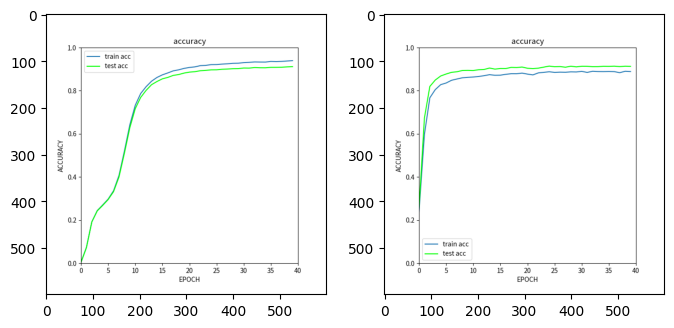

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/3_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/3aug_accuracy_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
levenshtein OCR：
https://arxiv.org/pdf/2209.03594.pdf

・画像から特徴抽出して予測　ー①
    
・CNNモデルから①をノイズデータとして受け取り、言語モデルに渡す
    ・1文字削除
    ・削除後にplaceholderの場所を予測

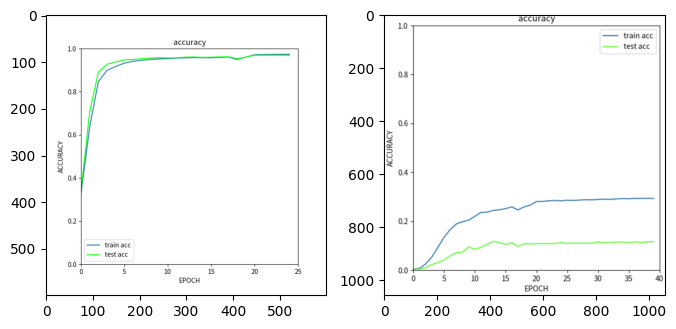

In [12]:
# 小さいデータ数 20000(確か)*0.1
#正解率の改善試みた場合の例
# 1枚目　全結合層の中間ノードの数を増やした
# 2枚目　ドロップアウトを外した（過学習起こる）
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/m7_1_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/Screenshot 2023-10-23 at 12.57.09.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
変更内容
・ネットワーク構造
・バッチ正則化☑️
・ドロップアウト☑️
・ノイズ追加 (±15回転, 0.8~1.2拡大)☑️
・最適化：SGD→Adam, RMSpropGraves☑️

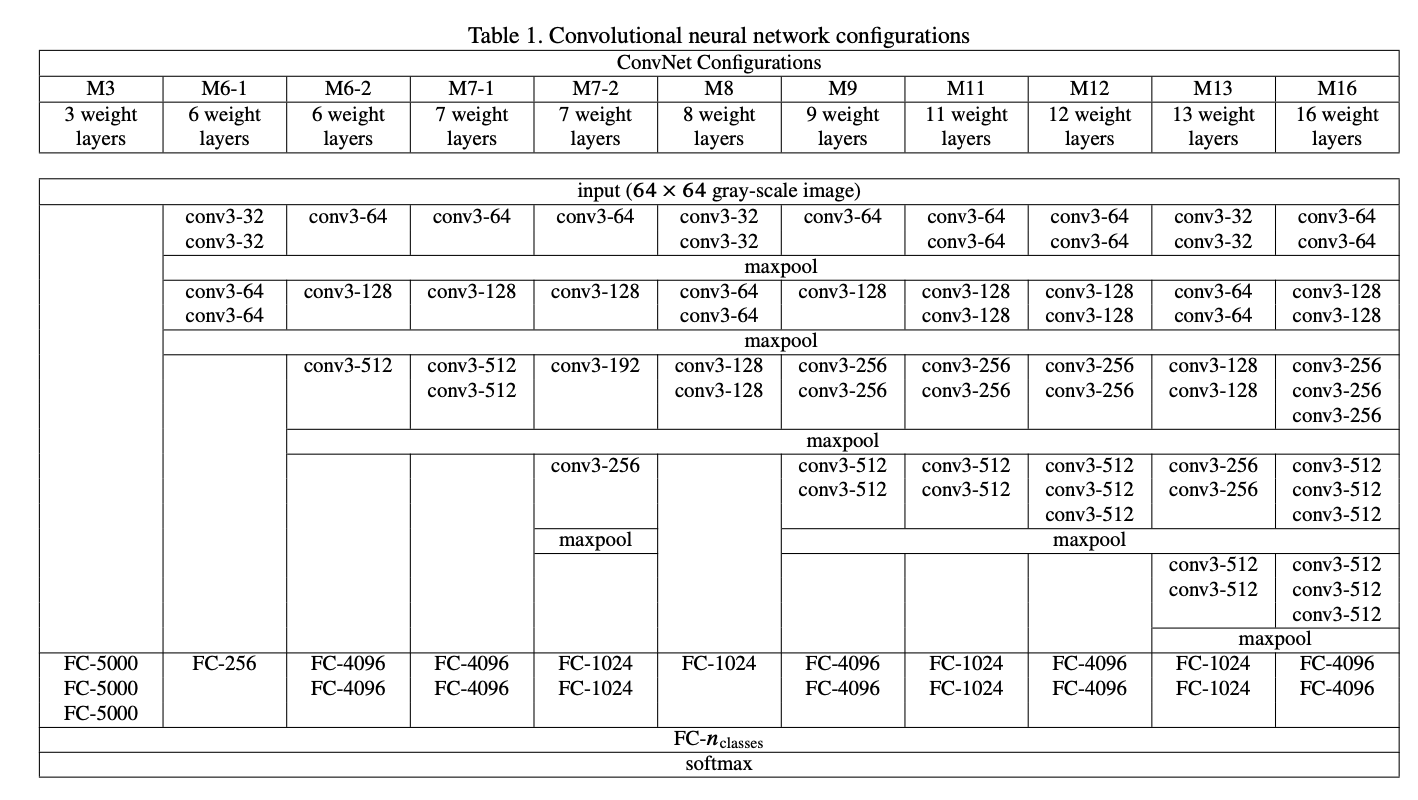

In [6]:
from PIL import Image
Image.open('Screenshot 2023-10-23 at 15.38.02.png')

In [ ]:
# 論文のNN
class Net_M7_1(nn.Module):
    def __init__(self):
        super(Net_M7_1, self).__init__()
        
        self.embedding_dropout = nn.Dropout(p = 0.5) # dropout
        
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2,padding = 1)

        self.conv1 = nn.Conv2d(in_channels = 3,out_channels = 64,kernel_size = 3,padding = 1)
        nn.init.normal_(self.conv1.weight, mean=0.0, std=0.1)
        self.bn1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding = 1)
        nn.init.normal_(self.conv2.weight, mean=0.0, std=0.1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 512,kernel_size = 3,padding = 1)
        nn.init.normal_(self.conv3.weight, mean=0.0, std=0.1)
        self.bn3 = nn.BatchNorm2d(num_features=512)
        self.conv4 = nn.Conv2d(in_channels = 512, out_channels = 512,kernel_size = 3,padding = 1)
        nn.init.normal_(self.conv4.weight, mean=0.0, std=0.1)
        
        #nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(12800, 6000) # 6272 = 32*14*14 # 3456 = 96*6*6 # 1152 = 288*2*2
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.1)
        self.fc2 = nn.Linear(6000, 3192)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.embedding_dropout(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.embedding_dropout(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.embedding_dropout(x)
        
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.embedding_dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# 現段階動くNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(3,16,3)
        self.conv2 = nn.Conv2d(16,32,3)

        self.fc1 = nn.Linear(32 * 14 * 14, 120)
        self.fc2 = nn.Linear(120, 3192)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
#現段階動くNN

# 動かなかった理由
# データ数に対してdropout率が高い　→ dropout率を下げるごとに正解率が改善
# FC層を 二層 -> 三層 で正解率が改善

# FC層などの出力、中間ノードが大きい（4096）と正解率低くなる
# 論文では 畳み込みch  128 -> 512 だが　チャンネルが増え過ぎて正解率が低くなる
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.embedding_dropout = nn.Dropout(p = 0.0005)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(3,64,3)
        nn.init.normal_(self.conv1.weight, mean=0.0, std=0.1)
        self.bn1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64,128,3)
        nn.init.normal_(self.conv2.weight, mean=0.0, std=0.1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv3 = nn.Conv2d(128,128,3)
        nn.init.normal_(self.conv3.weight, mean=0.0, std=0.1)

        self.fc1 = nn.Linear(128 * 13 * 13, 1024)
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.1)
        self.fc2 = nn.Linear(1024, 1024)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.1)
        self.fc3 = nn.Linear(1024, 3192)
        nn.init.normal_(self.fc3.weight, mean=0.0, std=0.1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.embedding_dropout(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.embedding_dropout(x)
        x = self.conv3(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.embedding_dropout(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.embedding_dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.embedding_dropout(x)
        x = self.fc3(x)
        return x

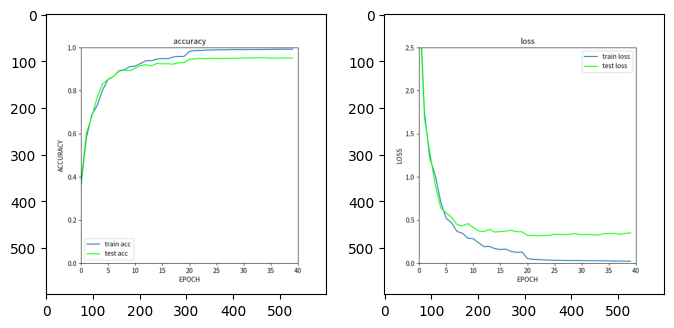

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/ch_128_fc1024_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/ch_128_fc1024_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
ずれ検知
再アライメントをとる
#　アライメントとったテキスト
　　わたしはは、なつやすみに、はじめてかぶとむしをつかまえました。　　# 'た'が消えなければ
    はやおきをしてううらやまにいきました。　　　　　　　　　　　　　　# 、->う
    てで、つかまえるとき、どきどきしままままままままままままました。　# ま？
    らいねんは、くわがたむしもつかまえたいとおもいました。
#　小学生テキスト
    わわしはは、・・・　　　　　　　# 'わ'と'は'：挿入　'た'：削除
    はやおきおして、うらやま・・・　
    ・・・どきどきしました。
    ・・・
    
問題点
今のコードだと
元テキストに対して、
挿入したとき　⭕️
削除したとき　❌

In [ ]:
# 今現段階で一番正解率高い（テストデータでも）モデル
　　わたしはは、なつやすみに、はははじめてかぶとむしをつかまえました。
    はやおきをしてううらやまにいきました。
    てで、つかまえるとき、どどきききききききどどどききしまままましたた。
    らいねんは、くわがたむしもつかまえたいとおもいました。

In [ ]:
アライメント問題点生じる箇所
1学年 1~5
・空白の前後　　　　　　　　'~7,8日まで'
・句読点や小さい文字の位置（縦書きの場合）
・汚すぎる字
    ・例）1-2
    ・文字の中心が空白と揃っていない
    ・枠をはみ出ている　ノイズデータとして
・例) 1-3 空白に対して、アライメントとっても無駄なので、空白には空白と判定したい
・例) 1-4 したした。〜ました。しINININ・・・ました。'前文に対して後文がマッチ'
2学年 1~5
    ・'す。'の前後でIN
・消し跡
 個人に対しての相対的な濃淡
4学年 1~5
・'冷たい海が好きな魚もいます。あたたかい海が好きな魚もいます。' '前文に対して後文がマッチ'
・一文まるまる抜けている場合に、対応したいが、、　

単語や文単位で抜けるときにもペナルティ
単語や文単位で抜けるときの方をペナルティ下げたい
調べる
・edit distance
・hierarchy 階層データ上で編集距離を考える

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.embedding_dropout = nn.Dropout(p = 0.005)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(3,64,3)
        nn.init.normal_(self.conv1.weight, mean=0.0, std=0.1)
        self.bn1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64,128,3)
        nn.init.normal_(self.conv2.weight, mean=0.0, std=0.1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv3 = nn.Conv2d(128,256,3) 
        nn.init.normal_(self.conv3.weight, mean=0.0, std=0.1)
        self.bn3 = nn.BatchNorm2d(num_features=256)
        self.conv4 = nn.Conv2d(256,256,3)
        nn.init.normal_(self.conv4.weight, mean=0.0, std=0.1)

        self.fc1 = nn.Linear(256 * 2 * 2, 1024)
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.1)
        self.fc2 = nn.Linear(1024, 1024)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.1)
        self.fc3 = nn.Linear(1024, 3192)
        nn.init.normal_(self.fc3.weight, mean=0.0, std=0.1)

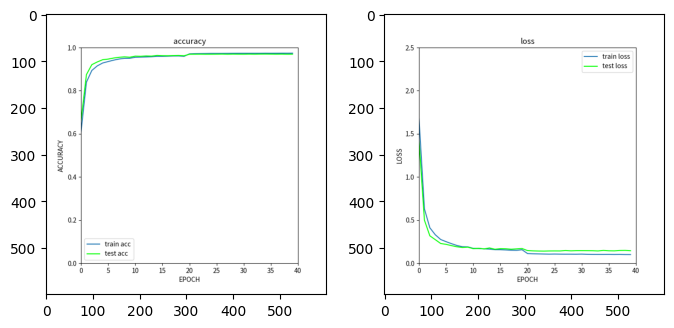

In [10]:
# 20000ほどのデータで
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/ch256_fc1024_dr0.005_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/ch256_fc1024_dr0.005_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.embedding_dropout = nn.Dropout(p = 0.005)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(3,64,3)
        nn.init.normal_(self.conv1.weight, mean=0.0, std=0.1)
        self.bn1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64,128,3)
        nn.init.normal_(self.conv2.weight, mean=0.0, std=0.1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv3 = nn.Conv2d(128,512,3)
        nn.init.normal_(self.conv3.weight, mean=0.0, std=0.1)
        self.bn3 = nn.BatchNorm2d(num_features=512)
        self.conv4 = nn.Conv2d(512,512,3)
        nn.init.normal_(self.conv4.weight, mean=0.0, std=0.1)

        self.fc1 = nn.Linear(512 * 5 * 5, 1024)
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.1)
        self.fc2 = nn.Linear(1024, 1024)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.1)
        self.fc3 = nn.Linear(1024, 3192)
        nn.init.normal_(self.fc3.weight, mean=0.0, std=0.1)

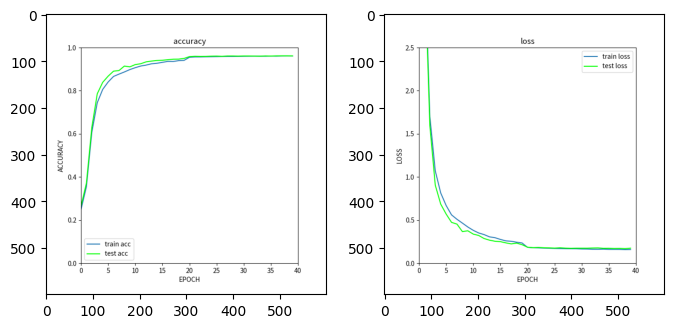

In [9]:
# 20000ほどのデータで
# こっち（128, 512）の方が過学習始まってない
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/ch512_fc1024_dr0.005_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/ch512_fc1024_dr0.005_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

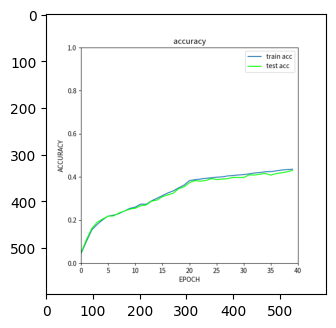

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/ch512_fc1024_accuracy_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,1,i+1)
    plt.imshow(mpimg.imread(d))

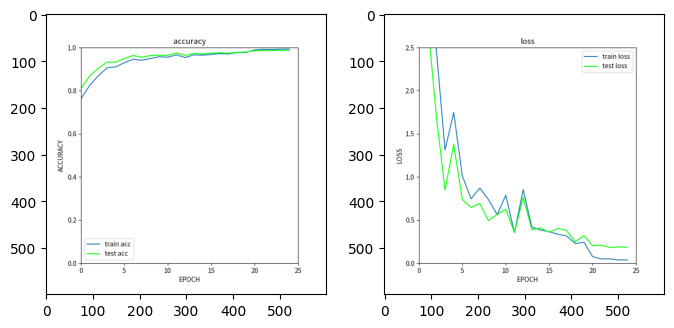

In [8]:
# ひらがな と 、。！？「」（）55種 データ数不明
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/hiragana_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/hiragana_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

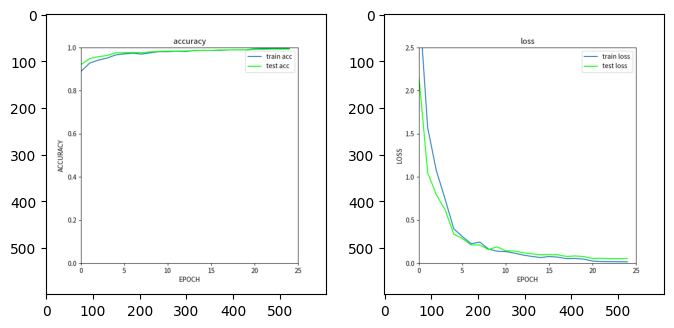

In [7]:
# カタカナ 48種 データ数不明
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/katakana_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/katakana_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

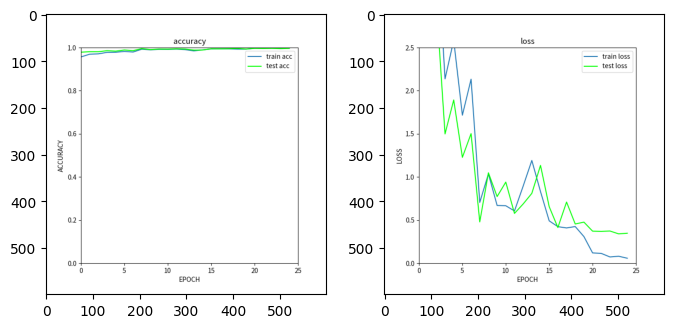

In [1]:
# 記号 20種 "　、。（）「」！？＠#％＆*_[]/|-'<>"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['/home/abababam1/HandwrittenTextAlign/py_cnn/kigou_accuracy_image.png',
                   '/home/abababam1/HandwrittenTextAlign/py_cnn/kigou_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

***文字単位ではなく単語単位で編集距離を計算する方法***

・１方向にしか実行できないため、双方向に実行した結果を用いる
・類似単語を用意した上で単語単位で修正 
　<font color="blue">参考：誤ったキーでも検索できるファイル構成法 所属 神戸大学</font>

In [ ]:
・データの確認（21火）✅
・誤字とマッチの区別（22水〜24金）☑️
・中間発表用のスライド（土日）☑️

アライメント
・ラベル付け（20月）✅
・速度遅いので改善（20月〜21火）☑️

In [ ]:
アライメント修正作業で気づいたこと
・空白判定を np.all としているが、緩くしても良い
・今の文字にはマッチしないが、離れた文字にはマッチする場合がある（正解でも）
・正解でなくても、離れてマッチしている文字同士は形が似ている
    双方向
    計算過程の確認

In [ ]:
MATCH と 置換 について
・本当に合っている場合、pmapの確率が高い
・間違ってる場合、pmapの確率が低い　かつ　最も高確率な字がお手本テキスト以外である 

置換になる場合
・INSERTとSKIPよりもコストが低い
・マッチ率が log1e-4以上

In [ ]:
子供の文字
・ラベルごとのファイル分け（プレートごとに分けておく。CNN用とアライメント用）
・出現頻度をカウント
・テストデータに使う

In [ ]:
・jsonからファイル分け　✅
・pmapの可視化 ✅
・計算過程の確認 ☑️

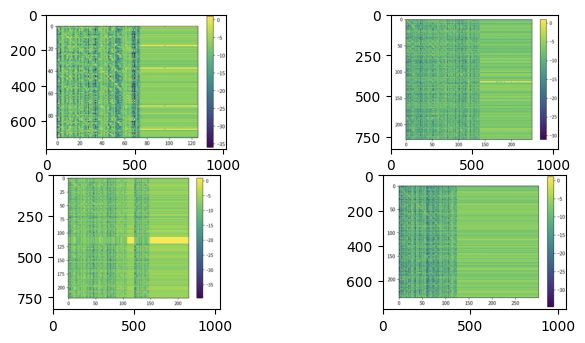

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./lev/pmap1_1.png', './lev/pmap3_4.png', './lev/pmap4_1.png', './lev/pmap6_2.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(4,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
・行で確率が高くなっている箇所の原因を突き止める ✅
・一列の中に確率高いピクセルが複数あった時、上から採用したい ⚠️審議あり
・削除と挿入スコアの分布 
・スコアと確率マップとの関係を考える。挿入と削除のコスト
・
・子供のデータ数を揃える
    ・訓練：ETL、テスト：子供 ✅
    ・訓練：ETL、子供、テスト：子供 ✅
    データアーグメンテーションはあまり考えない

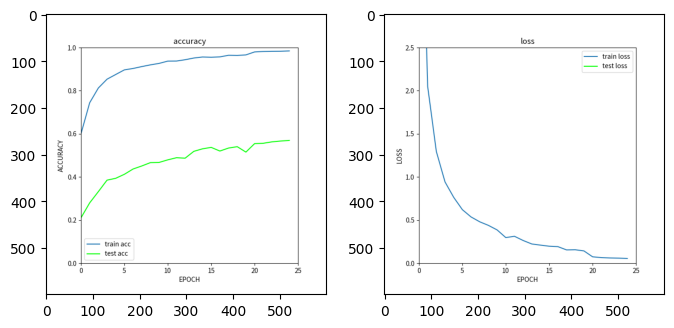

In [11]:
# 訓練データ：ETL 105449
# テストデータ：子供 30147
# 10:3 154種 
# use kodomo_data.py
# PATH_TO_TRAIN = '/data2/abababam1/HandwrittenTextAlign/kodomo_train'
# PATH_TO_TEST = '/data2/abababam1/HandwrittenTextAlign/kodomo_test'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./test_kodomo_accuracy_image.png', './test_kodomo_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

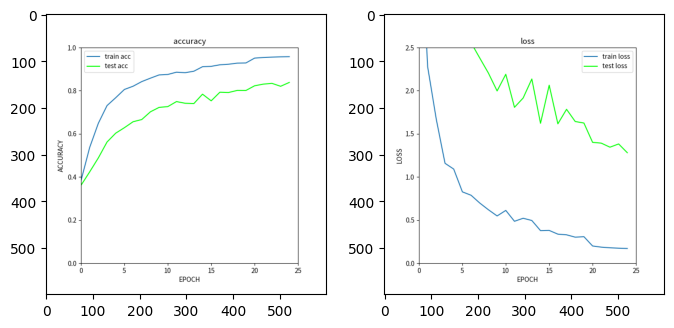

In [6]:
# 訓練データ：ETL＋子供 105013
# テストデータ：子供 12902
# 10:1 143種 
# use kodomo_data.py
#PATH_TO_TRAIN = '/data2/abababam1/HandwrittenTextAlign/kodomotrain2/train/'
#PATH_TO_TEST = '/data2/abababam1/HandwrittenTextAlign/kodomotrain2/test/'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./test2_kodomo_accuracy_image.png', './test2_kodomo_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

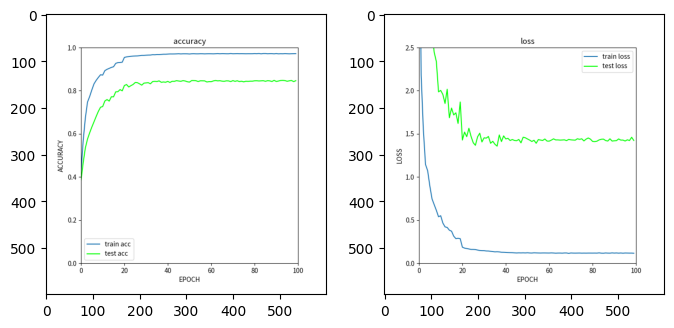

In [1]:
# 訓練データ：ETL＋子供 105013
# テストデータ：子供 12902
# 10:1 143種  エポック100
# use kodomo_data.py
# test  mean loss=1.469424809613185, accuracy=0.8288637420554953 25エポック時点で
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./kodomott100_accuracy_image.png', './kodomott100_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
・途中までで終わってるのに後ろの方までマッチを探しに行ってるのを防ぐ ☑️
    ・マップ過程で画像から空白検知 ✅
    ・アライン過程で、空白検知した箇所の(i,j)を削る ✅
    → ⚠️'MATCH'ではないと判定されて'INSERT'判定になった
・離れてマッチした時のペナルティを考える ✅
    ・直後にマッチするはずなのに、ずれている時
        ・目で判断した際は'す'と読めるが、predictedクラスが'す'では無いため、'MATCH'せず、後ろの'す'で'MATCH'してる可能性
        ・同じ文字は離れていたらペナルティつけたいが、あくまで予測であるため同じ文字である確証がない
・削除と挿入スコアの分布 ☑️
・スコアと確率マップとの関係を考える。挿入と削除の ☑️

・OCRは精度高くなるようにモデルの改造☑️
    ・オプティマイザーの変更 SAM ✅
    ・層を増やす
・記号だけの精度を出す ✅

・視写課題の効果について教育系の論文調べる ☑️

・アライメントでマッチ判定かつ先頭からの位置を比較して精度を出すprecision recall
・子供の字で訓練したモデルでアライメント表示
・ETL全データ全文字種（ETL2は除く）で訓練

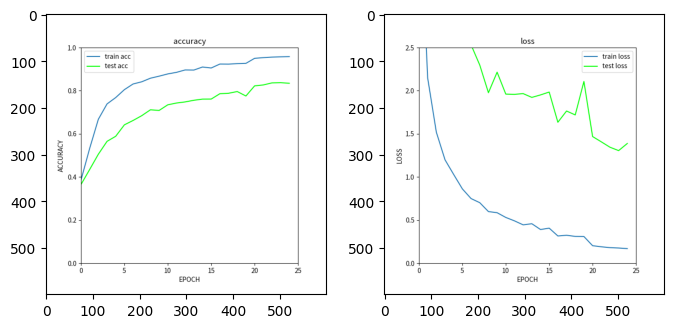

In [6]:
# 訓練データ：ETL＋子供 105013
# テストデータ：子供 12902
# 10:1 143種  エポック100
# optimizer: Adam + SAM 
# test accuracy = 0.83
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./kodomottAdam+SAM_accuracy_image.png', './kodomottAdam+SAM_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

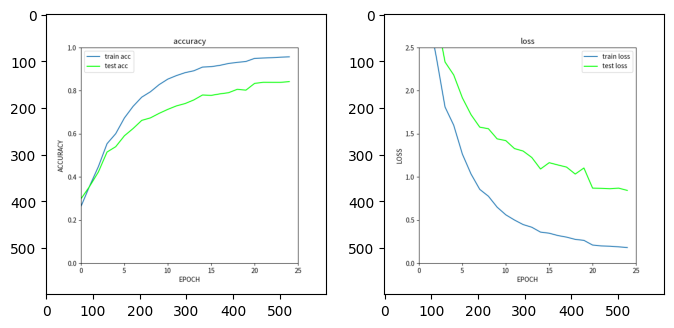

In [19]:
# 訓練データ：ETL＋子供 105013
# テストデータ：子供 12902
# 10:1 143種  エポック100
# optimizer: SGD + SAM 
# test accuracy = 0.84
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path_list = ['./kodomottSGD+SAM_accuracy_image.png', './kodomottSGD+SAM_loss_image.png']
plt.figure(figsize=(8,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,2,i+1)
    plt.imshow(mpimg.imread(d))

In [ ]:
CNNが動かなくなった②
解決: 松崎先生

手を加えたプログラムを kaya2: /home/matuzaki/Work/2023-12-28-CNN-OCR-debug/pytorch_cnn_3.py におきました。
いろいろ変えたので何が問題だったか、はっきりしないのですが、前よりは良くなったと思います。
300クラスでしか試していないので、3088クラスで訓練してみてください > 
直したのは以下の点。プログラムでは変えたところに mtzk: ... というコメントが付けてあります。
訓練データを回転する際に周囲にできる余白が 255 で埋められていたのを 0 で埋めるようにした（これは有効だと思われる）#⚠️元から255で白、NLPも白で実験しているはず
（回転した時にできる周囲の部分が真っ黒の状態になっていた）
Conv2D のパラメータを初期化するときの標準偏差が大きすぎたらしいのを He et al. (2015) に従って修正 # 勾配消失に強い修正方法で有名
全結合層のパラメータの初期化の際も標準偏差が大きすぎたらしいのを He et al. に従って修正
BatchNorm2D のうち一つ（bn3）が異なる場所で使いまわされていたのを分けた # これは私の無知＆ミス
最後の全結合層にも BatchNorm を入れた # 大事
Dropout 確率が小さすぎたのを修正 #❓ 以前動かなくなった時は、dropout率下げたので、剪定し過ぎなのかと、、？

In [ ]:
import os
from pathlib import Path
import shutil
import json
from glob import glob
from tqdm import tqdm
from PIL import Image
import numpy as np

def detect_255(img):
    #img_gray = img.convert("L")
    # 画像をNumPy配列に変換
    img_array = np.array(img)
    return np.count_nonzero(img_array >= 239) >= img_array.size*0.998 # 0.05%くらいは白くなくてOK
    #return np.all(img_array > 200)

# /data/matuzaki/2023-09-19-char-imgs/学年-クラス/元画像ファイル名/
#DIR = '/data2/abababam1/HandwrittenTextAlign/nlp2024_data/kodomo_noclass/'
DIR = '/data/matuzaki/2023-09-19-char-imgs/'
count_all = []
for grade in ['1', '2', '3', '4', '5', '6']:
    all_image = glob(f"{DIR}/{grade}-*/**/**.png")

    count = 0
    count_ = 0
    for image in all_image:
        img = Image.open(image)
        count_ += 1
        if detect_255(img):
            pass
        else:
            count += 1
    count_all.append(count/count_)

zipped = zip(['1', '2', '3', '4', '5', '6'], count_all)
print(count_all)
# 文字数？

In [ ]:
・途中を残して、結果、精度などを出力しておくと良い
・データ作った時のアライン結果出力、

・プログラムの改善と、OCRの内部の原因

In [ ]:
# NLP24のOCRモデルA　＋　NLPのアルゴリズム

f1=0.6034880641622216

In [ ]:
# NLP24のOCRモデルA　＋　古いアルゴリズム（強制SKIP, INSERTあり） # このアルゴリズムは、手動でアルゴリズム取ったときのもの（大体）
./lev/eval_align_mtzk.py ./lev_git/fixed-2023-11-20 ./lev/align_eval_0206 

precision=0.8117946110828673, recall=0.4812827777442884, f1=0.6042991220102938

In [ ]:
# 古いOCRモデル　＋　古いアルゴリズム（強制SKIP, INSERTあり） # 古いOCRモデルは、辞書に句読点が含まれている
./lev/eval_align_mtzk.py ./lev_git/fixed-2023-11-20 ./lev/align_eval_0206_oldmodel 

precision=0.8489874834639259, recall=0.5029236240882512, f1=0.6316626287098727

In [ ]:
# NLP24のOCRモデルA(’ ’。、追加) + 古いアルゴリズム（強制SKIP, INSERTあり）
./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./lev/align_eval/align_eval_0227

precision=0.861505464201818, recall=0.5084694677195732, f1=0.6394996209249432

In [ ]:
# 手動でアラインメント(11/20)
./eval_align.py fixed-2023-11-20 align-2023-11-20

precision=0.8875060768108897, recall=0.5646534837206425, f1=0.690190b5434015525

In [3]:
import os

def count_files_in_directories(directory_path):
    # ディレクトリ内の各エントリ（フォルダやファイル）に対してループ
    for entry in os.listdir(directory_path):
        # エントリのフルパスを取得
        entry_path = os.path.join(directory_path, entry)
        # エントリがディレクトリ（フォルダ）であるかチェック
        if os.path.isdir(entry_path):
            # ディレクトリ内のファイル数をカウント
            file_count = len([name for name in os.listdir(entry_path) if os.path.isfile(os.path.join(entry_path, name))])
            print(f"ディレクトリ '{entry}' には {file_count} 個のファイルがあります。")

# ここに調べたいディレクトリのパスを指定してください
directory_path = '/data2/abababam1/HandwrittenTextAlign/nlp2024_data/0301_+3kodomo_real/'
#directory_path = '/data2/yuxuanteng/CNN_pytorch/generated/diffusion_char_tran550/'
count_files_in_directories(directory_path)


ディレクトリ '0x0020' には 550 個のファイルがあります。
ディレクトリ '0x3002' には 493 個のファイルがあります。
ディレクトリ '0x3001' には 778 個のファイルがあります。


In [6]:
chr(int('0x3044', 16))

'い'

In [7]:
format(ord('。'),'#06x')

'0x3002'

In [11]:
import os
import shutil
from random import shuffle

def split_files(src_directory, train_directory, test_directory, test_ratio=0.1):
    # ソースディレクトリ内のファイルリストを取得
    files = [f for f in os.listdir(src_directory) if os.path.isfile(os.path.join(src_directory, f))]
    # ファイルリストをシャッフル
    shuffle(files)
    
    # テストファイルの数を計算
    num_files = len(files)
    num_test_files = int(num_files * test_ratio)
    
    # ファイルを分割
    test_files = files[:num_test_files]
    train_files = files[num_test_files:]
    
    # テストファイルをテストディレクトリに移動
    for f in test_files:
        shutil.copy(os.path.join(src_directory, f), os.path.join(test_directory, f))
    
    # 訓練ファイルを訓練ディレクトリに移動
    for f in train_files:
        shutil.copy(os.path.join(src_directory, f), os.path.join(train_directory, f))

# ここにパスを設定してください
src_directory = '/data2/abababam1/HandwrittenTextAlign/etl_data/images/ETL2/0x3002'
train_directory = '/data2/abababam1/HandwrittenTextAlign/nlp2024_data/0227_+3/train/0x3002'
test_directory = '/data2/abababam1/HandwrittenTextAlign/nlp2024_data/0227_+3/test/0x3002'

split_files(src_directory, train_directory, test_directory)


In [ ]:
Name     F_1                       文字数             説明                        
A        0.6034880641622216        1698400         ETL                      
B        0.6196300490751228        1783650         ETL+Gene_char            
C        0.5960315056043624        1747350         ETL+Gene_radical         
D        0.6707413695529144        1801637         ETL+Kodomo+Kanji_from_Gene_radical+HK_from_Gene_char
E        0.6139411206077873        1783650         ETL+GAN                  
A'       0.6096041334245118        1716387         ETL+Kodomo               
B'       0.6735626108950886        1801637         ETL+Kodomo+Gene_char     
C'       0.6636205724643153        1765337         ETL+Kodomo+Gene_radical  
D'       0.6329783216255004        1783650         ETL+Kanji_from_Gene_radical+HK_from_Gene_char
E'       0.6487815952777358        1801637         ETL+Kodomo+GAN      

In [ ]:
nlp2024

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/A_ETL_wb/
precision=0.8121822249339028, recall=0.48146362047139674, f1=0.604549067100632

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/B_ETL+d_c/
precision=0.8313289540171804, recall=0.49587075773102657, f1=0.6212052560036248

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/C_ETL+d_r/
precision=0.8028743247375395, recall=0.4748327204774248, f1=0.5967424242424243

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/D_ETL+d_r\&c/
precision=0.8473993118801862, recall=0.5047923322683706, f1=0.6326923803407503

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/E_ETL+GAN/
precision=0.8296821968528232, recall=0.4862860931942854, f1=0.6131802979629066

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/A\`_ETL+kodomo/
precision=0.8244062917651896, recall=0.4833926095605522, f1=0.6094391244870041

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/B\`_ETL+kodomo+d_c/
precision=0.9012632642748863, recall=0.5375851467840135, f1=0.6734632230780848

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/C\`_ETL+kodomo+d_r/
precision=0.8895631067961165, recall=0.5302308758816083, f1=0.6644257279903313

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/D\`_ETL+kodomo+d_r\&c/
precision=0.8945986875315497, recall=0.5341491349689553, f1=0.668906167434136

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/E\`_ETL+kodomo+GAN/
precision=0.8723685548662666, recall=0.5170896377117367, f1=0.6493073953523579

# binary
./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/A_bi_binary_ETL/
precision=0.43606822080936525, recall=0.26047380794502384, f1=0.3261378217223942

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/B_binary_ETL+d_c/
precision=0.3279862792574657, recall=0.19597323527638796, f1=0.2453492321044489

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/C_binary_ETL+d_r/
precision=0.2618614980819705, recall=0.15636867803966484, f1=0.19581053028873371

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/D_binary_ETL+d_r\&c/
precision=0.28967813540510545, recall=0.17306648984266682, f1=0.21667924528301888

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/A\`_binary_ETL+kodomo/
precision=0.41301715438950554, recall=0.24672976068479113, f1=0.3089173176346277

./lev/eval_align_mtzk.py  ./lev_git/fixed-2023-11-20/ ./nlp2024/align_eval/B\`_binary_ETL+kodomo+d_c/
precision=0.416305115528201, recall=0.2487190306829827, f1=0.31139622641509435

In [25]:
d = [["A", 'ETL',0.6034880641622216, 1698400], ["B", 'ETL+Gene_char', 0.6196300490751228, 1698400+85250], \
     ["C", 'ETL+Gene_radical', 0.5960315056043624, 1698400+48950], \
     ["D", 'ETL+Kodomo+Kanji_from_Gene_radical+HK_from_Gene_char',  0.6707413695529144, 1698400+17987+85250], \
     ["E", 'ETL+GAN', 0.6139411206077873, 1698400+85250], ["A'", 'ETL+Kodomo', 0.6096041334245118, 1698400+17987], \
     ["B'", 'ETL+Kodomo+Gene_char', 0.6735626108950886, 1698400+17987+85250], ["C'", 'ETL+Kodomo+Gene_radical', 0.6636205724643153, 1698400+17987+48950], \
     ["D'", 'ETL+Kanji_from_Gene_radical+HK_from_Gene_char', 0.6329783216255004, 1698400+85250], ["E'", 'ETL+Kodomo+GAN', 0.6487815952777358, 1698400+17987+85250]]

print("{:<8} {:<25} {:<15} {:<25} ".format("Name", "F_1", "文字数", "説明"))

for v in d:
    name, ex, f, number = v
    print("{:<8} {:<25} {:<15} {:<25}".format(name, f, number, ex))

Name     F_1                       文字数             説明                        
A        0.6034880641622216        1698400         ETL                      
B        0.6196300490751228        1783650         ETL+Gene_char            
C        0.5960315056043624        1747350         ETL+Gene_radical         
D        0.6707413695529144        1801637         ETL+Kodomo+Kanji_from_Gene_radical+HK_from_Gene_char
E        0.6139411206077873        1783650         ETL+GAN                  
A'       0.6096041334245118        1716387         ETL+Kodomo               
B'       0.6735626108950886        1801637         ETL+Kodomo+Gene_char     
C'       0.6636205724643153        1765337         ETL+Kodomo+Gene_radical  
D'       0.6329783216255004        1783650         ETL+Kanji_from_Gene_radical+HK_from_Gene_char
E'       0.6487815952777358        1801637         ETL+Kodomo+GAN           


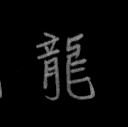

In [3]:
from PIL import Image
img = Image.open("/data2/abababam1/HandwrittenTextAlign/0215test/train/0x9f8d/002910.png")
img

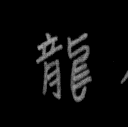

In [4]:
from PIL import Image
img = Image.open("/data2/abababam1/HandwrittenTextAlign/0215test/test/0x9f8d/054522.png")
img

/home/abababam1/.conda/envs/HandwrittenTextAlign/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/abababam1/.conda/envs/HandwrittenTextAlign/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


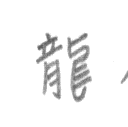

In [5]:
from PIL import Image
import os
import torchvision.transforms as transforms
with Image.open("/data2/abababam1/HandwrittenTextAlign/0215test/test/0x9f8d/054522.png") as img:
    # 画像をRGBに変換（グレースケール画像の場合も考慮）
    img = img.convert("RGB")

    # 明度を反転
    inverted_img = Image.eval(img, lambda x: 255 - x)
inverted_img

In [ ]:
# 句読点足したバージョン

A（ETL）
precision=0.8878687848153497, recall=0.5188377840737838, f1=0.6549480652893506
precision=0.9719743885798258, recall=0.5582012176743625, f1=0.709143819880533

B（ETL＋diff）
precision=0.916514690982776, recall=0.5453011031406354, f1=0.683774897010469
precision=0.9704793252417198, recall=0.5687503767556815, f1=0.7171905286762191

C（ETL＋radi）🟥kaya2
precision=0.8696682464454977, recall=0.5088311531737899, f1=0.6420231983266782
precision=0.9637185823956252, recall=0.5524142504068962, f1=0.702276036477891

D（ETL＋diff＆radi）
precision=0.909625722689928, recall=0.5405991922358189, f1=0.6781609195402298
precision=0.970672977979008, recall=0.5686298149376092, f1=0.7171475272741095

E（ETL＋GAN）🟥kaya4
precision=0.9069865764718318, recall=0.517270480438845, f1=0.6588099808061421
precision=0.9691610955359068, recall=0.541804810416541, f1=0.6950469783087808

A`（ETL＋kodomo）
precision=0.9310728744939272, recall=0.55452408222316, f1=0.6950772601911671
precision=0.9733347060640379, recall=0.5698957140273675, f1=0.7188806934833852

B`（ETL＋kodomo＋diff）
precision=0.9392532795156407, recall=0.5610947013080957, f1=0.7025170761160797
precision=0.9722250691811007, recall=0.571824703116523, f1=0.7201093145069459

C`（ETL＋kodomo＋radi）🟥kaya2
precision=0.9081674116212921, recall=0.5389113267828078, f1=0.6764271932811259
precision=0.9733443537555533, recall=0.567906444029176, f1=0.7172986142835389

D`（ETL＋kodomo＋diff＆radi）
precision=0.9463942550824315, recall=0.564048465850865, f1=0.7068288261066626
precision=0.97573264781491, recall=0.5720055458436313, f1=0.721213042486889

E`（ETL＋kodomo＋GAN）🟥kaya4
precision=0.9381862545750305, recall=0.5562722285852071, f1=0.6984295175023653
precision=0.9738339021615472, recall=0.5676050394839954, f1=0.7171909513291187




A_bi_new（ETL_bi）🟥kaya3
precision=0.4603448275862069, recall=0.2736150461148954, f1=0.3432265870165223

B_bi_new（ETL_bi＋diff_bi）
precision=0.38977571226510405, recall=0.2325637470613057, f1=0.29131271944727605

C_bi 🟥kaya2

D_bi_new（ETL_bi＋diff＆radi_bi）
precision=0.34454545454545454, recall=0.20561818072216528, f1=0.2575408660198573

A`_bi（ETL_bi＋kodomo_bi）🟥kaya1
precision=0.47849788007268323, recall=0.28573150883115317, f1=0.35780335912436306

B`_bi（ETL_bi＋kodomo_bi＋diff_bi）
precision=0.4546371985064083, recall=0.2715654952076677, f1=0.3400256623141369

C`_bi（ETL_bi＋kodomo_bi＋diff_bi）🟥kaya4

D`_bi（ETL_bi＋kodomo_bi＋diff＆radi_bi）
precision=0.4430992736077482, recall=0.2647537524865875, f1=0.33145919021923703

In [ ]:
❌
A_bi（ETL_bi）
precision=0.43902942694889, recall=0.25631442522153236, f1=0.32366598157874704

B_bi（ETL_bi＋diff_bi）
precision=0.3212084470041427, recall=0.19163300982578818, f1=0.24005134788189988

D_bi（ETL_bi＋diff＆radi_bi）
precision=0.34104454995454087, recall=0.2035083489059015, f1=0.25490788281485954

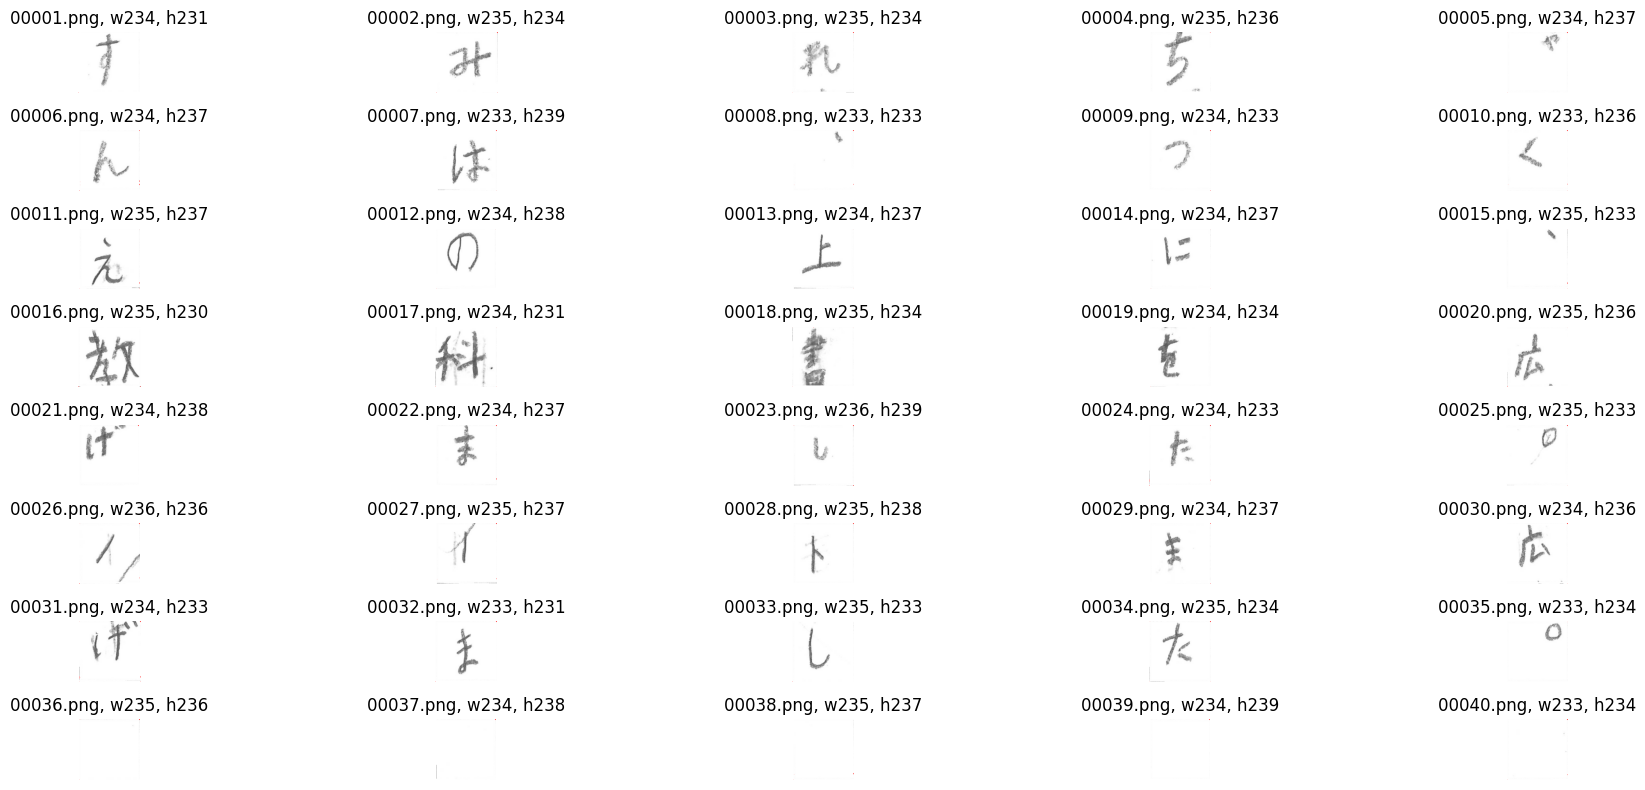

In [42]:
# 戸田市小学校 ID読み取り失敗: OCR Result: '8.79'%
import os
from PIL import Image
import matplotlib.pyplot as plt

directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/xaaa.tif'
directory = '/home/abababam1/HandwrittenTextAlign/test/Sut/xaaa_S1-202/' # ☑️
directory = '/home/abababam1/HandwrittenTextAlign/test/Ekmek/xaax_S1-194/' # ☑️
directory = '/home/abababam1/HandwrittenTextAlign/test/Cocuk/xabc_S2-1/' # ☑️
directory = '/home/abababam1/HandwrittenTextAlign/test/Onlar/xaab_S2-33/' # ☑️
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaau_S1-21/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaas_S2-25/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaag_S1-7/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaal_S1-188/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaaq_S2-179/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Kadin/xaad_S3-52/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_xaau/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_new/xaau_57/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_new/xaat_48/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_new/xaap_219/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_new/xaah_60/'
directory = '/home/abababam1/HandwrittenTextAlign/test/Anna/output_new/xaah_125/'
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/sasame-2-2/xaat_S2-18/'
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/bijogi-1-1/xaab_S1-156/'
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/bijogi-1-2/xaah_S1-198' # ❌無効
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/bijogi-1-2/xaao_S1-204'  # ❌無効
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/miyamoto-1-1/xaaa_S1-7'
directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/sasame-2-2/xaad_S2-5' 
#directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/sasame-2-3/xaay_S2-41/' # ❌切り抜き失敗
#directory = '/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/bijogi-1-3/xaac_S1-229/'

#directory = '/data2/abababam1/HandwrittenTextAlign/toda_charclass_imgs/0x767d/'
#directory = '/data2/abababam1/HandwrittenTextAlign/toda_charclass_imgs/0x308b'

# ディレクトリから画像ファイルのリストを取得（画像ファイルのみを取得）
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))
         if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:40]  # 先頭から10枚のみ取得

# 先頭から10枚の画像を表示
fig, axes = plt.subplots(8, 5, figsize=(20, 8))  # 2行5列のサブプロットを作成
axes = axes.flatten()  # axesを1次元配列に変換

for ax, img_path in zip(axes, files):
    img = Image.open(img_path)  # 画像を読み込む
    ax.imshow(img)  # imshowを使って画像を表示
    ax.axis('off')  # 軸を非表示にする
    width, height = img.size
    ax.set_title(f'{os.path.basename(img_path)}, w{width}, h{height}')

plt.tight_layout()
plt.show()

In [ ]:
5/2
定量的に 5/2
アラインメントの空白挿入考える 
OCRに記号の追加して再訓練

アラインメント
今回回収数（421）文字数びっちり
前回回収数（338）文字数半分

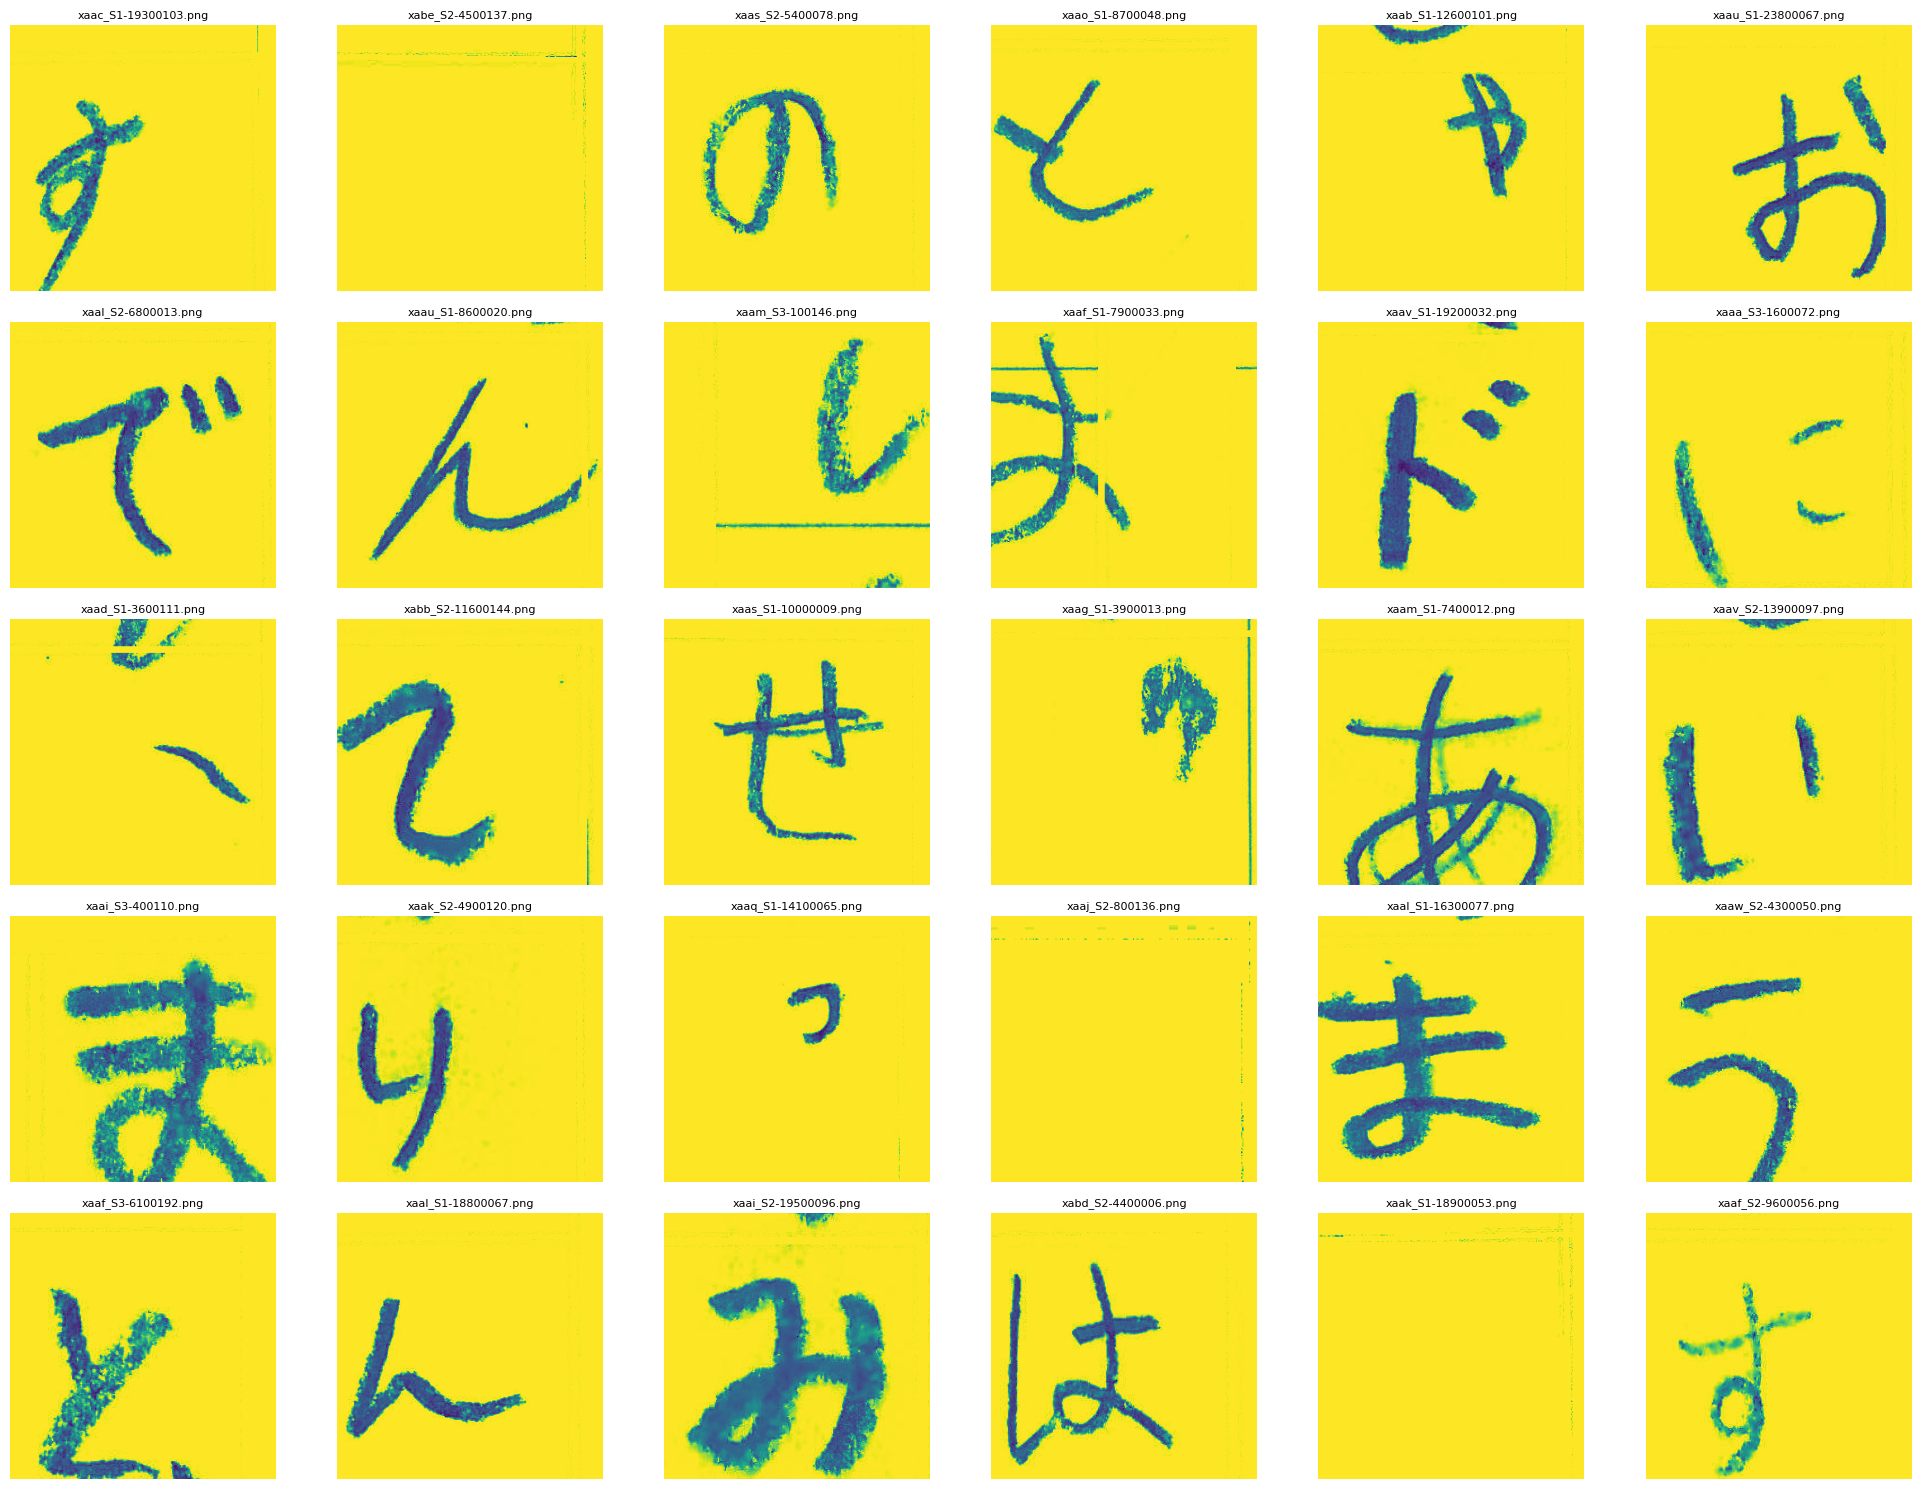

In [4]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパスを取得
image_paths = glob.glob('/data2/abababam1/HandwrittenTextAlign/toda_char_imgs/**/**/*', recursive=True)

# 画像ファイルのみをフィルタリング（拡張子でフィルタリングする場合）
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg'))]

# ランダムに30枚の画像を選択
selected_images = random.sample(image_paths, 30)

# 画像を表示
fig, axes = plt.subplots(5, 6, figsize=(20, 15))  # 5行6列で表示
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # 軸の非表示
    # ファイル名の取得と表示
    filename = os.path.basename(img_path)
    sheetname = img_path.split('/')[-2] + filename
    ax.set_title(sheetname, fontsize=8)  # ファイル名をタイトルとして設定

plt.tight_layout()
plt.show()


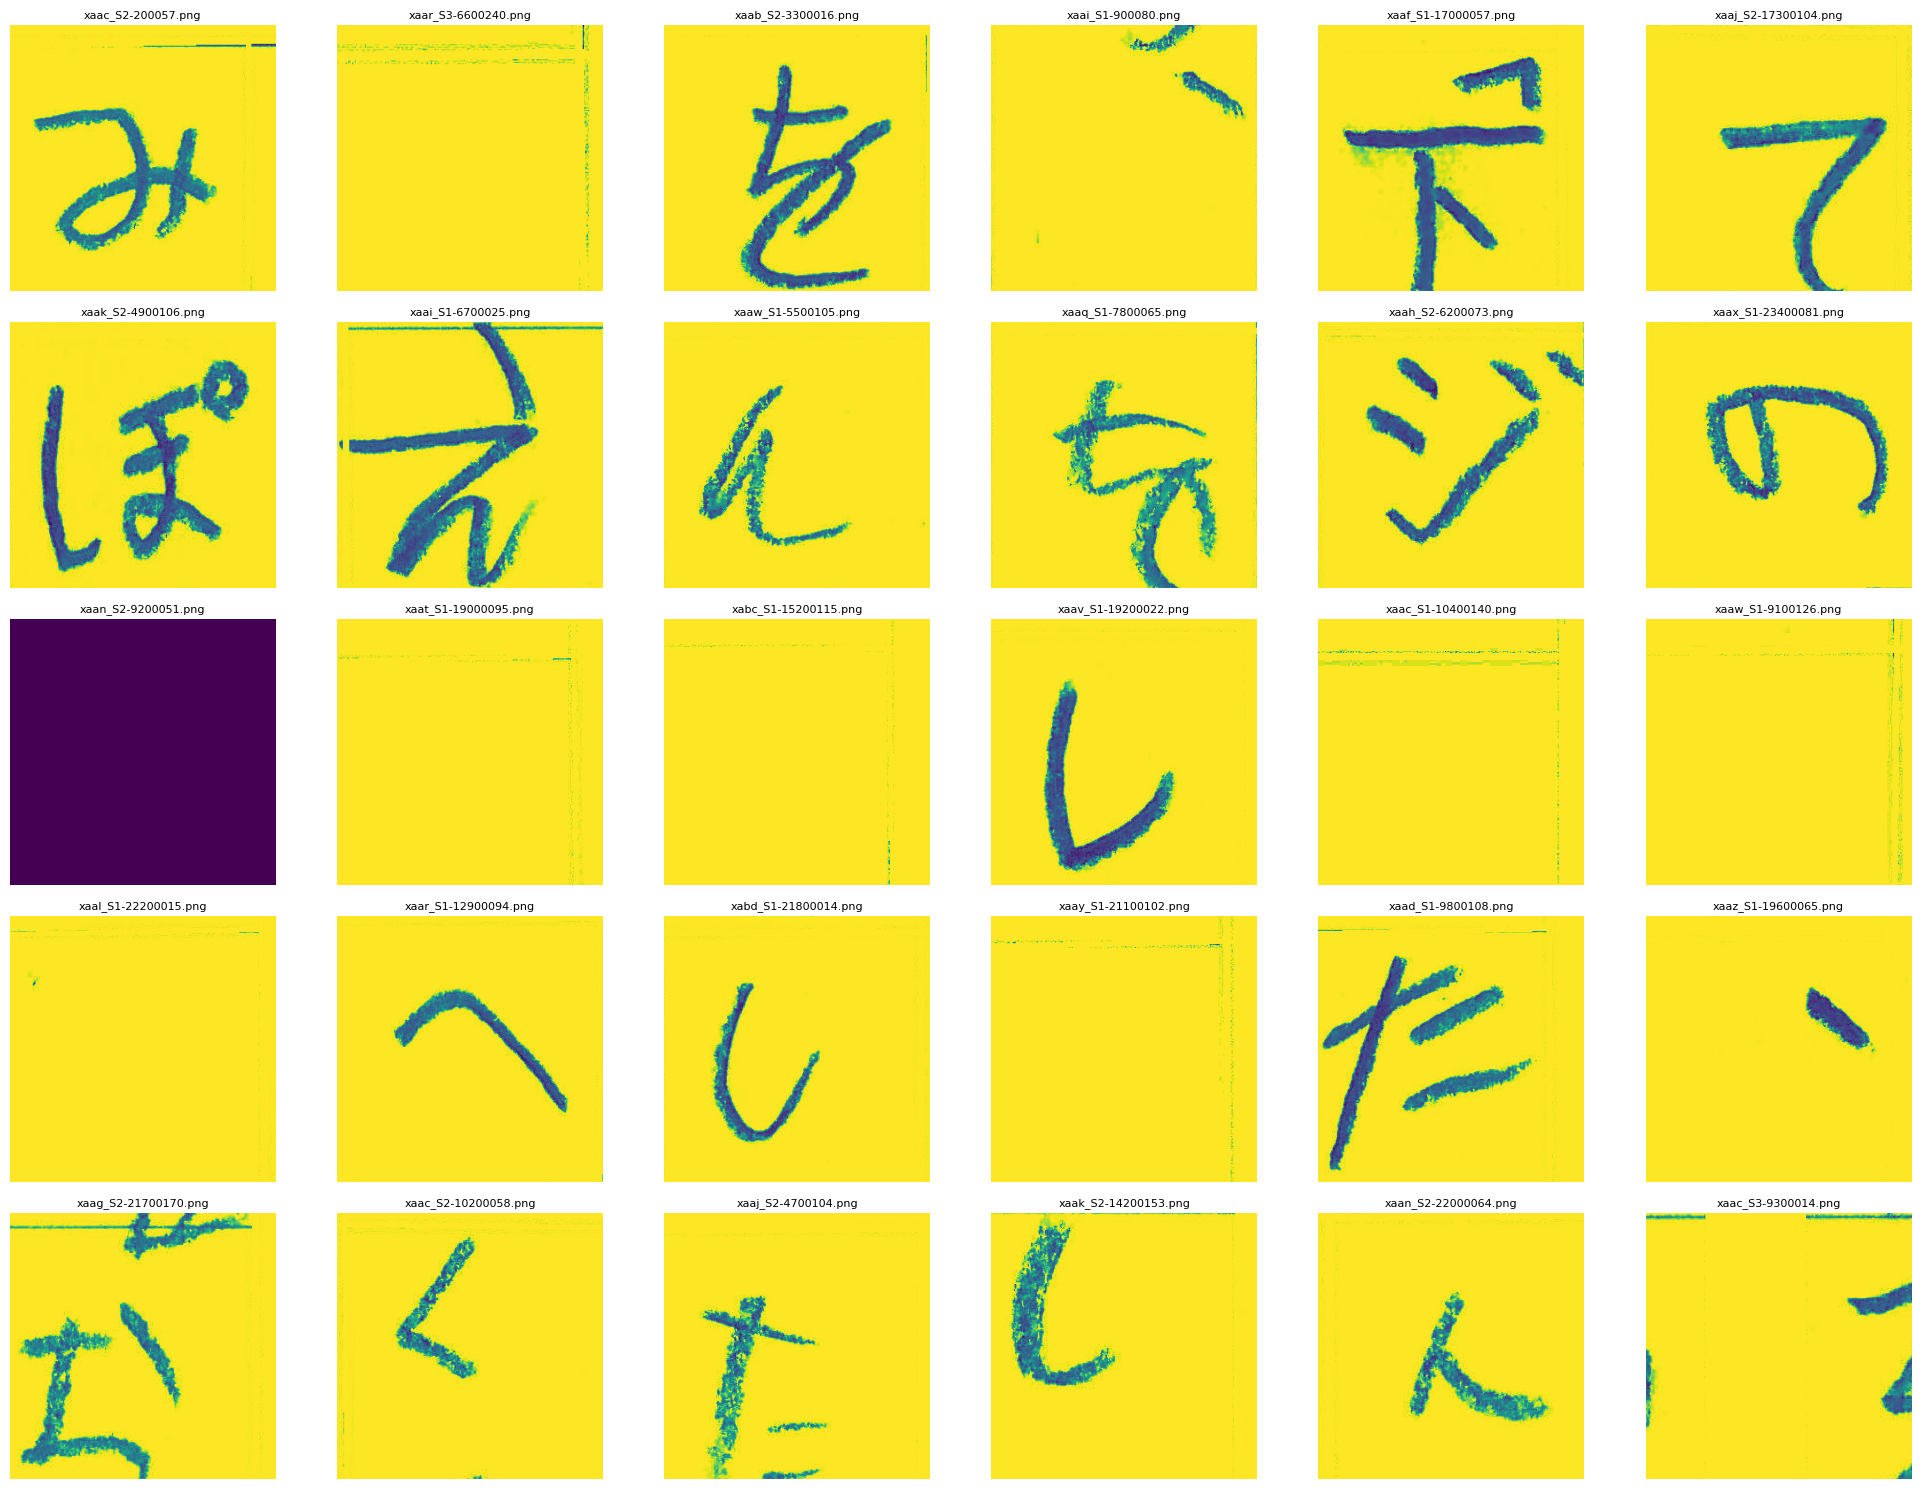

In [1]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパスを取得
image_paths = glob.glob('/data2/abababam1/HandwrittenTextAlign/toda_char_imgs/**/**/*', recursive=True)

# 画像ファイルのみをフィルタリング（拡張子でフィルタリングする場合）
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg'))]

# ランダムに30枚の画像を選択
selected_images = random.sample(image_paths, 30)

# 画像を表示
fig, axes = plt.subplots(5, 6, figsize=(20, 15))  # 5行6列で表示
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # 軸の非表示
    # ファイル名の取得と表示
    filename = os.path.basename(img_path)
    sheetname = img_path.split('/')[-2] + filename
    ax.set_title(sheetname, fontsize=8)  # ファイル名をタイトルとして設定

plt.tight_layout()
plt.show()


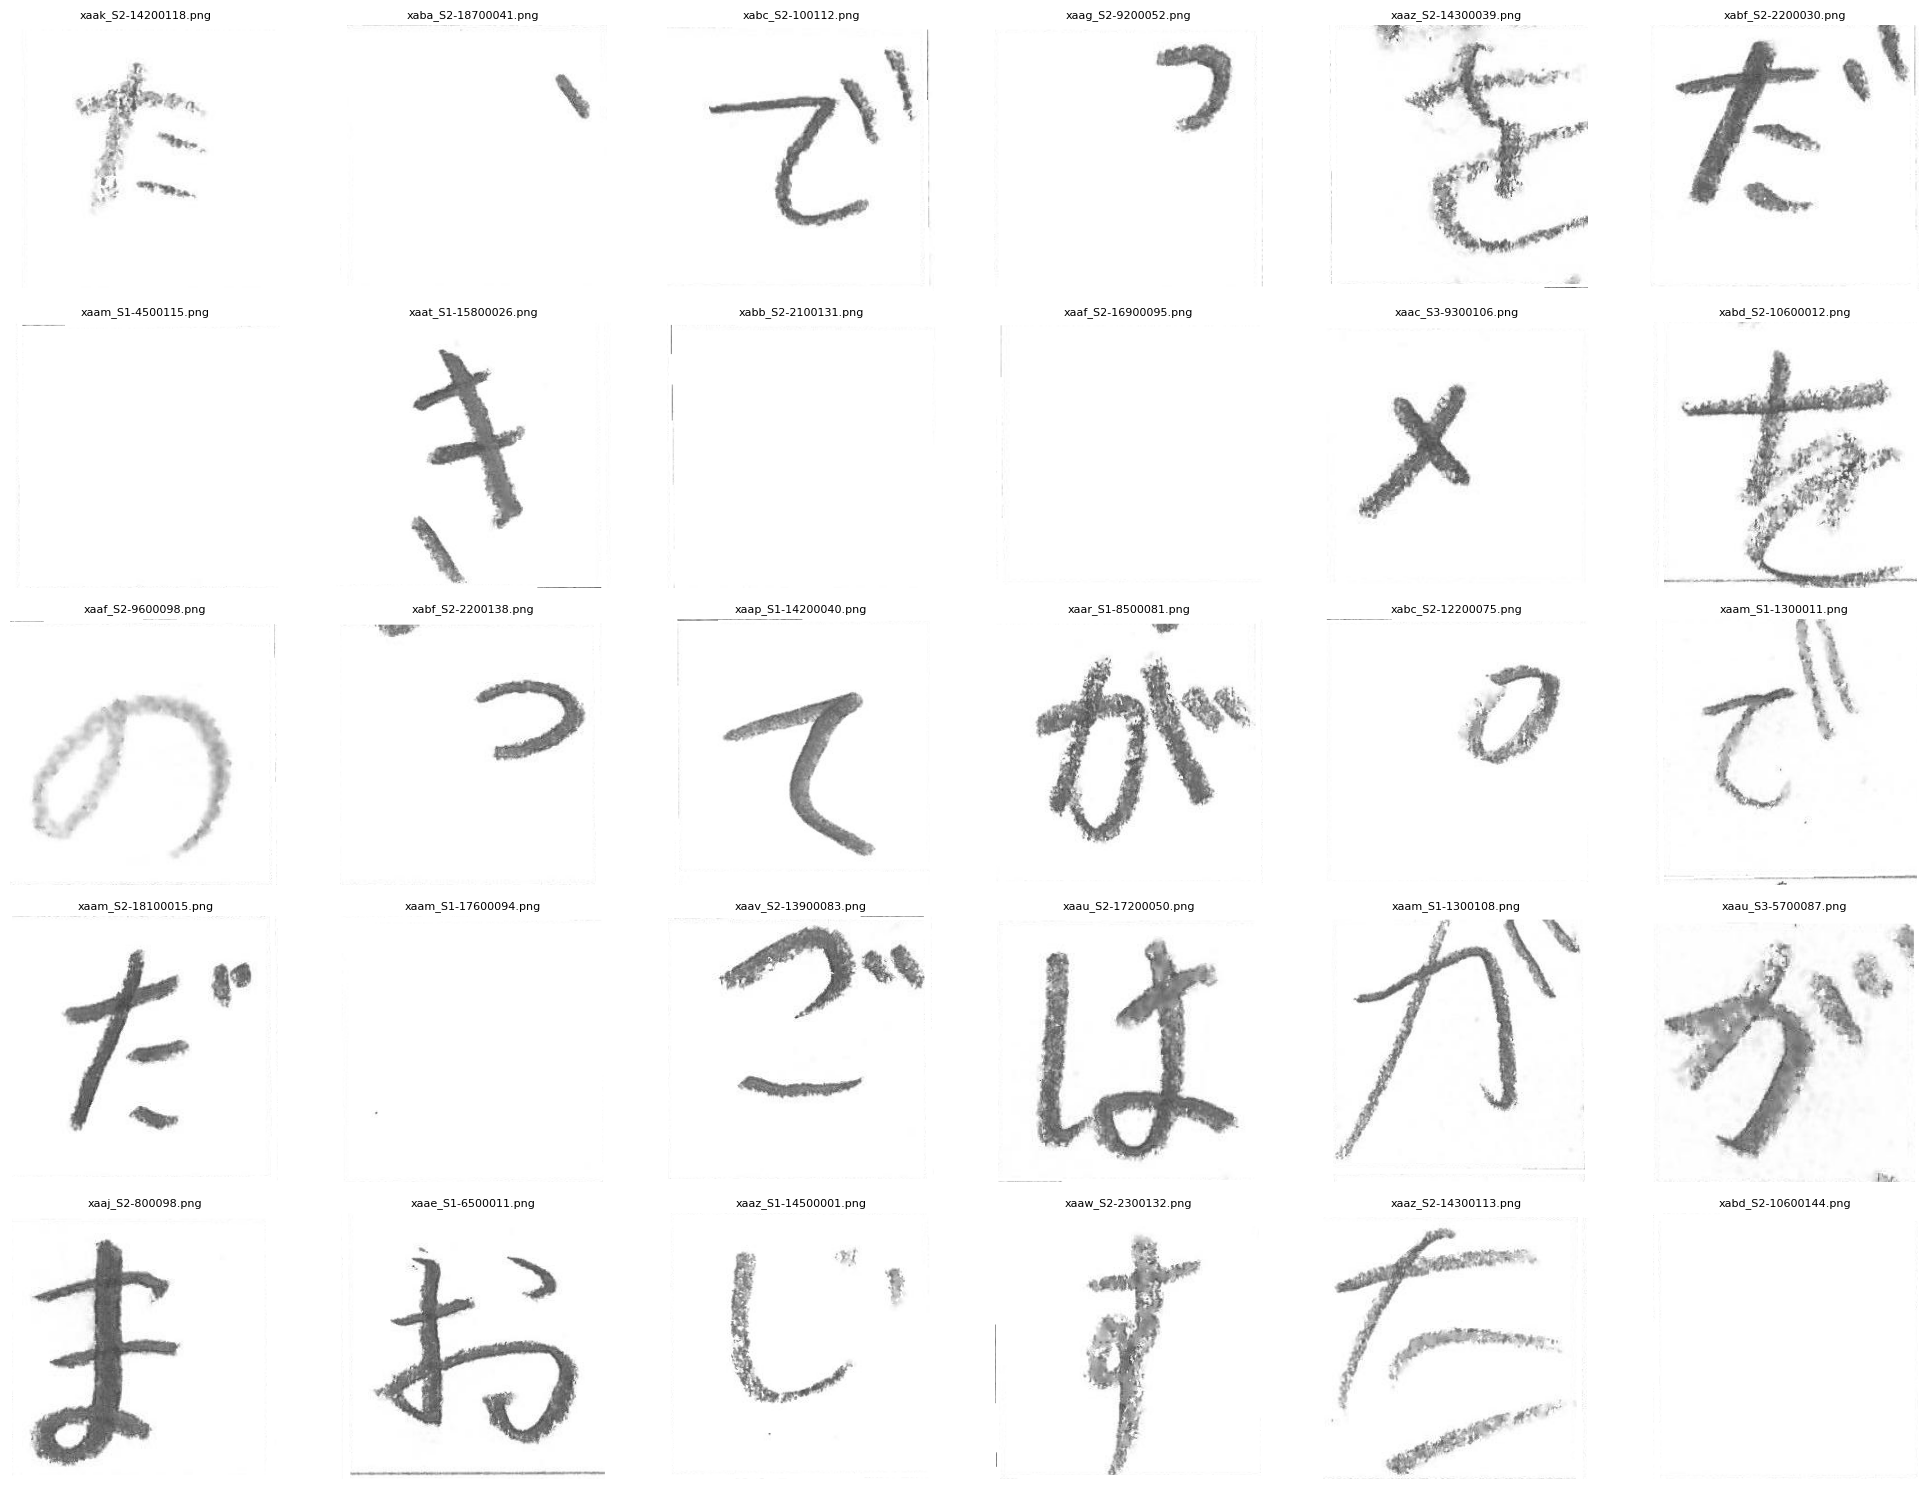

In [2]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパスを取得
image_paths = glob.glob('/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_new/**/**/*', recursive=True)

# 画像ファイルのみをフィルタリング（拡張子でフィルタリングする場合）
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg'))]

# ランダムに30枚の画像を選択
selected_images = random.sample(image_paths, 30)

# 画像を表示
fig, axes = plt.subplots(5, 6, figsize=(20, 15))  # 5行6列で表示
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # 軸の非表示
    # ファイル名の取得と表示
    filename = os.path.basename(img_path)
    sheetname = img_path.split('/')[-2] + filename
    ax.set_title(sheetname, fontsize=8)  # ファイル名をタイトルとして設定

plt.tight_layout()
plt.show()

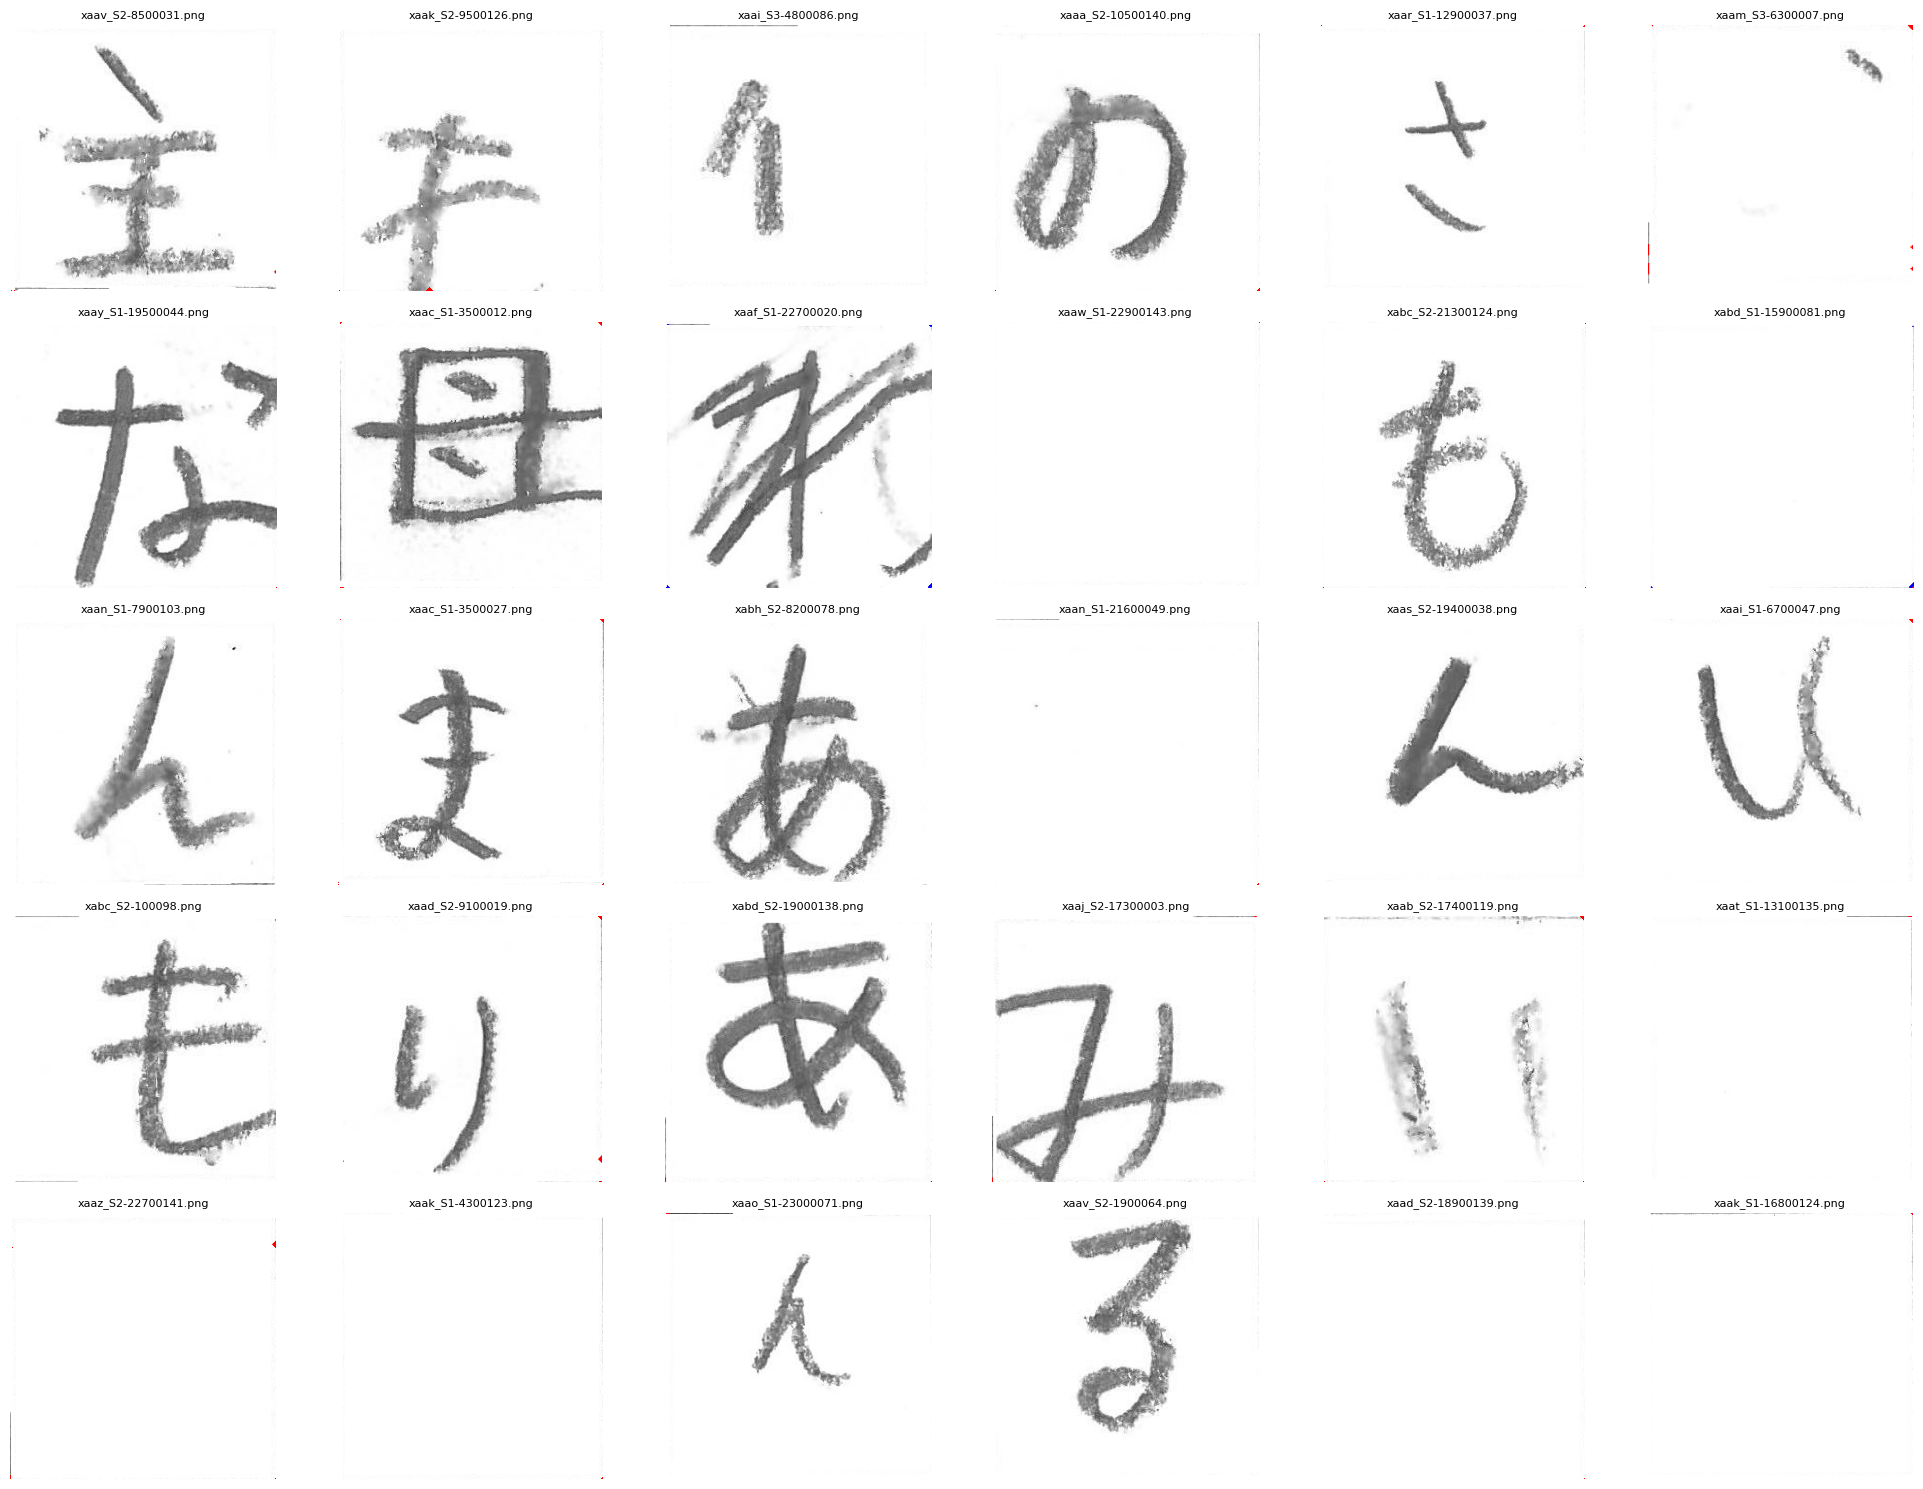

In [3]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパスを取得
image_paths = glob.glob('/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns/**/**/*', recursive=True)

# 画像ファイルのみをフィルタリング（拡張子でフィルタリングする場合）
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg'))]

# ランダムに30枚の画像を選択
selected_images = random.sample(image_paths, 30)

# 画像を表示
fig, axes = plt.subplots(5, 6, figsize=(20, 15))  # 5行6列で表示
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # 軸の非表示
    # ファイル名の取得と表示
    filename = os.path.basename(img_path)
    sheetname = img_path.split('/')[-2] + filename
    ax.set_title(sheetname, fontsize=8)  # ファイル名をタイトルとして設定

plt.tight_layout()
plt.show()

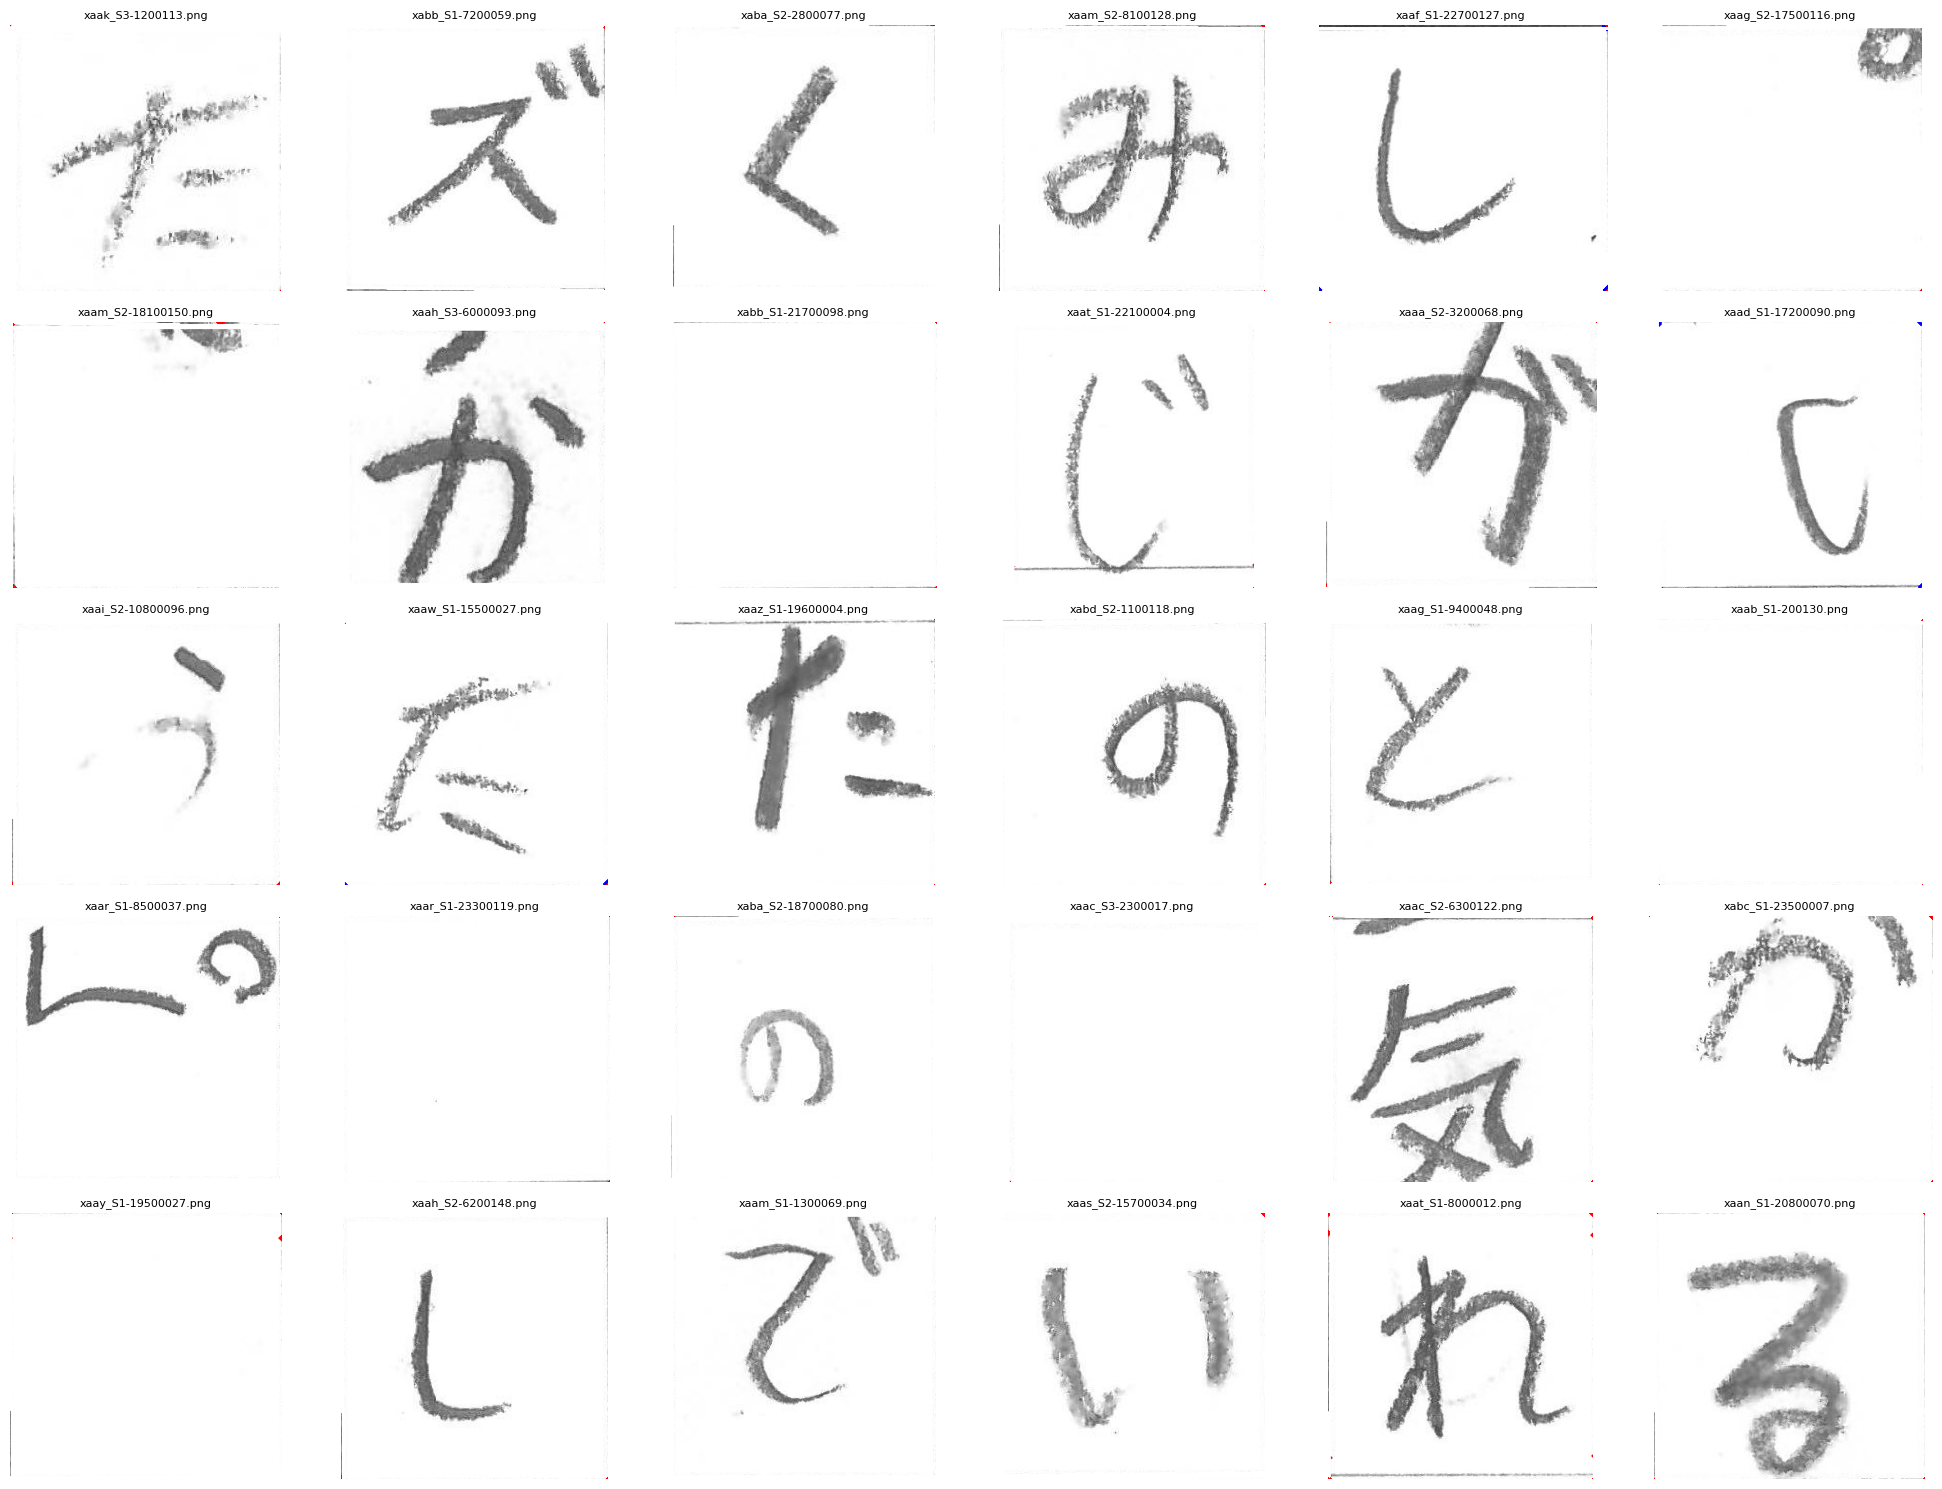

In [4]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパスを取得
image_paths = glob.glob('/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot/**/**/*', recursive=True)

# 画像ファイルのみをフィルタリング（拡張子でフィルタリングする場合）
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg'))]

# ランダムに30枚の画像を選択
selected_images = random.sample(image_paths, 30)

# 画像を表示
fig, axes = plt.subplots(5, 6, figsize=(20, 15))  # 5行6列で表示
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # 軸の非表示
    # ファイル名の取得と表示
    filename = os.path.basename(img_path)
    sheetname = img_path.split('/')[-2] + filename
    ax.set_title(sheetname, fontsize=8)  # ファイル名をタイトルとして設定

plt.tight_layout()
plt.show()

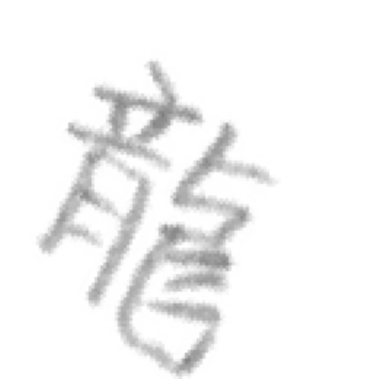

In [4]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
chara_png_path = '/data2/yuxuanteng/CNN_pytorch/ETL_images_tran/train/0x9f8d/607074_transformed_1.png'
img_ = Image.open(chara_png_path)
#img = img_.convert("RGB")
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#img = img[..., ::-1]
#img = Image.fromarray(img)
plt.imshow(img)
plt.axis('off')  # 軸を表示しないようにする
plt.show()

文字種類数: 319
　ひらがな: 73
　カタカナ: 59
　   漢字: 178
　   記号: 8


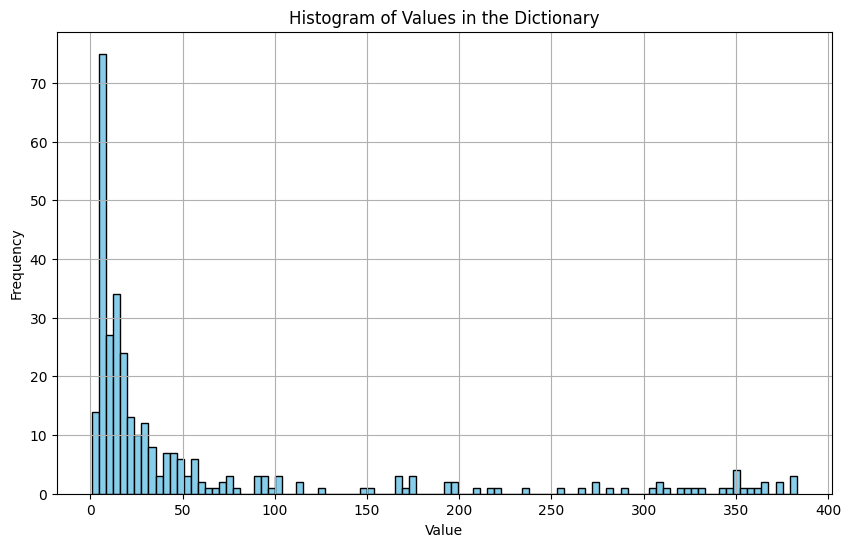

In [26]:
import os
import matplotlib.pyplot as plt

def categorize_character(char):
    if '\u3040' <= char <= '\u309F':  # ひらがなの範囲
        return "ひらがな"
    elif '\u30A0' <= char <= '\u30FF':  # カタカナの範囲
        return "カタカナ"
    elif '\u4E00' <= char <= '\u9FFF':  # 漢字の範囲
        return "漢字"
    elif '\u3000' <= char <= '\u303F' or '\uFF00' <= char <= '\uFFEF':  # 記号の範囲
        return "記号"
    else:
        return "その他"

def count_files_in_subdirectories(directory):
    char_dic = dict()
    hira = 0
    kana = 0
    kanji = 0
    kigou = 0
    others = 0
    print(f"文字種類数: {len(os.listdir(directory))}")
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        subdir_name = chr(int(subdir, 16))
        category = categorize_character(subdir_name)
        if category == 'ひらがな':
            hira += 1
        elif category == 'カタカナ':
            kana += 1
        elif category == '漢字':
            kanji += 1
        elif category == '記号':
            kigou += 1
        if os.path.isdir(subdir_path):
            file_count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
            #print(f"{subdir_name}: {file_count}")
            char_dic[subdir_name] = file_count
    print(f"　ひらがな: {hira}")
    print(f"　カタカナ: {kana}")
    print(f"　   漢字: {kanji}")
    print(f"　   記号: {kigou}")
            
    # 辞書の値のヒストグラムを作成
    values = list(char_dic.values())

    # ヒストグラムのプロット
    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=100, color='skyblue', edgecolor='black')
    plt.title('Histogram of Values in the Dictionary')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

imgs_dir = '/data2/abababam1/HandwrittenTextAlign/toda_charclass_imgs'
count_files_in_subdirectories(imgs_dir)

In [4]:
import json
# 学年ごとの筆者数
grade = dict()
grade['1'] = 0
grade['2'] = 0
grade['3'] = 0
input_file = '/home/abababam1/HandwrittenTextAlign/HandwrittenTextAlign/ID-filename.json'
with open(input_file) as f:
    dic = json.load(f)
for i in range(len(dic)):
    if dic[i][0]:
        grade[dic[i][0][1]] += 1
print(grade)

{'1': 195, '2': 193, '3': 35}


In [19]:
import glob
import os
# シートごとに取れた字数, 学年ごとに取れた字数
sheet_dict = dict()
grade_dict = dict()
grade_dict['1'] = 0
grade_dict['2'] = 0
grade_dict['3'] = 0
target_dir = '/home/abababam1/HandwrittenTextAlign/HandwrittenTextAlign/fixed-2024-07-24/'
for path in glob.glob(f'{target_dir}/*-*/*.json'):
    with open(path) as f:
        edits = json.load(f)
    number = 0
    sheet_name = os.path.basename(path)
    grade = sheet_name.split('_')[1][1]
    for i in reversed(range(len(edits['edits']))):
        if edits['edits'][i][0] == 'MATCH':
            number = i
            break
    sheet_dict[sheet_name] = number + 1
    grade_dict[grade] += number
print(grade_dict)

{'1': 23544, '2': 30249, '3': 4605}


{'1': 27621, '2': 42443, '3': 22507, '4': 12269, '5': 18393, '6': 20365}


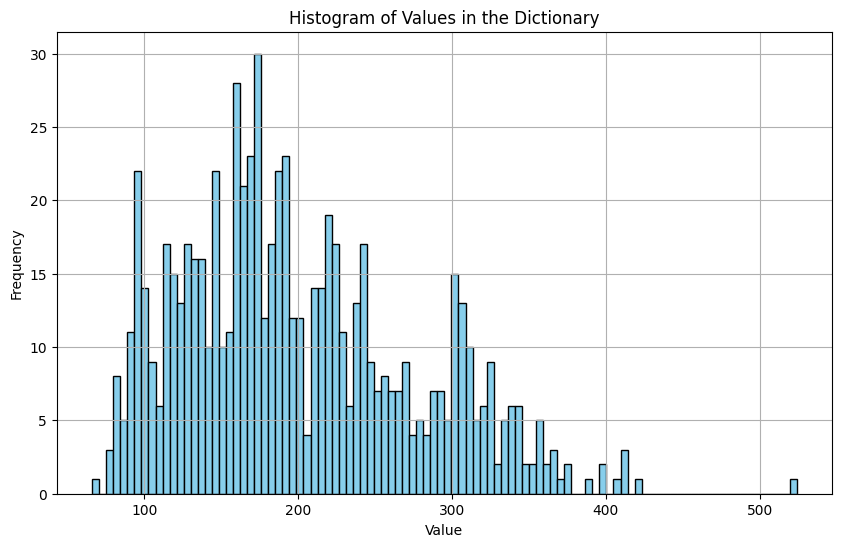

723

In [31]:
import glob
import os
import matplotlib.pyplot as plt
# シートごとに取れた字数, 学年ごとに取れた字数
sheet_dict = dict()
grade_dict = dict()
grade_dict['1'] = 0
grade_dict['2'] = 0
grade_dict['3'] = 0
grade_dict['4'] = 0
grade_dict['5'] = 0
grade_dict['6'] = 0
target_dirs = [
    '/home/abababam1/HandwrittenTextAlign/HandwrittenTextAlign/fixed-2024-07-24/',
    '/home/abababam1/HandwrittenTextAlign/HandwrittenTextAlign/fixed-2023-11-20/'
]
for target_dir in target_dirs:
    for path in glob.glob(f'{target_dir}/*/*.json'):
        with open(path) as f:
            edits = json.load(f)
        number = 0
        sheet_name = os.path.basename(path)
        if '_' in sheet_name:
            grade = sheet_name.split('_')[1][1]
        else:
            grade = sheet_name.split('-')[0]
        for i in reversed(range(len(edits['edits']))):
            if edits['edits'][i][0] == 'MATCH':
                number = i
                break
        sheet_dict[sheet_name] = number + 1
        grade_dict[grade] += number
print(grade_dict)
# 辞書の値のヒストグラムを作成
values = list(sheet_dict.values())

# ヒストグラムのプロット
plt.figure(figsize=(10, 6))
plt.hist(values, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Values in the Dictionary')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
len(sheet_dict)
#4077 + 12194 + 17902 + 12269 + 18393 + 20365
#27621 + 42443 + 22507 + 12269 + 18393 + 20365

In [ ]:
gold: fixしたデータ
test: fix前にalignmentしたデータ

・元々
precision=0.9524844238486951, recall=0.9194580595449584, f1=0.9356799024198994
・SK, INコスト加工
precision=0.9662399681634277, recall=0.9354251835363113, f1=0.9505829128240822

In [ ]:
# 100％目指して
・08-22 空白と字のマッチスコア: log1e-10
precision=0.9441552629719481, recall=0.857986772543396, f1=0.8990109668303843

・08-22 句点の位置変更
precision=0.9519107293096577, recall=0.9202285909976242, f1=0.9358015823783561
・08-24 句点の位置変更 画像加工なし
precision=0.950957837455205, recall=0.9201215727403095, f1=0.9352856070577741
→ モデルが1マスに。」を含む画像に対応してない
→ モデルに「」、濁点カタカナが含まれていない

・08-24 板橋の字、「」（）追加
precision=0.9733863172591558, recall=0.9699278696945699, f1=0.9716540160384235
・08-24 カタカナ追加（濁点など）
precision=0.9755033054491774, recall=0.975920892104193, f1=0.9757120540968522

In [ ]:
追加した文字
0x30a3	ィ
0x30a7	ェ
0x30c7	デ
0x30b6	ザ
0x30d1	パ
0x30bc	ゼ
0x30fb	・
0x30ba	ズ
0x30ae	ギ
0x30ac	ガ
0x30d3	ビ
0x30d7	プ
0x30d0	バ
0x30b2	ゲ
0x30dd	ポ
0x30da	ペ
0x30dc	ボ
0x30b4	ゴ
0x30c0	ダ
0x30c2	ヂ
0x30d6	ブ
0x30c9	ド
0x30b8	ジ
0x30b0	グ
0x30d4	ピ
0x30c5	ヅ
0x30d9	ベ
0x30be	ゾ

In [43]:
import os

def get_all_files(directory):
    file_set = set()
    for root, _, files in os.walk(directory):
        for file in files:
            # ファイルの相対パスを取得
            relative_path = os.path.relpath(os.path.join(root, file), directory)
            file_set.add(relative_path)
    return file_set

def compare_directories(dir1, dir2):
    files_in_dir1 = get_all_files(dir1)
    files_in_dir2 = get_all_files(dir2)

    # dir1 にあって dir2 にないファイル
    only_in_dir1 = files_in_dir1 - files_in_dir2
    # dir2 にあって dir1 にないファイル
    only_in_dir2 = files_in_dir2 - files_in_dir1

    if only_in_dir1:
        print("Dir1 にのみ存在するファイル:")
        for file in sorted(only_in_dir1):
            print(file)
    else:
        print("Dir1 にのみ存在するファイルはありません。")

    if only_in_dir2:
        print("\nDir2 にのみ存在するファイル:")
        for file in sorted(only_in_dir2):
            print(file)
    else:
        print("Dir2 にのみ存在するファイルはありません。")


# 使用例
dir1 = "./HandwrittenTextAlign/toda_alignment/align-2024-08-22/"  # 比較したいディレクトリ1のパスを指定
dir2 = "./HandwrittenTextAlign/HandwrittenTextAlign/fixed-2024-07-24/"  # 比較したいディレクトリ2のパスを指定

compare_directories(dir1, dir2)


Dir1 にのみ存在するファイル:
sasame-2-3/xaay_S2-65.json

Dir2 にのみ存在するファイル:
bijogi-1-1/.ipynb_checkpoints/xaaa_S1-148-checkpoint.json
bijogi-2-2/.ipynb_checkpoints/xaae_S2-151-checkpoint.json


385 385
precision=0.9662399681634277, recall=0.9354251835363113, f1=0.9505829128240822
バツ: 2518


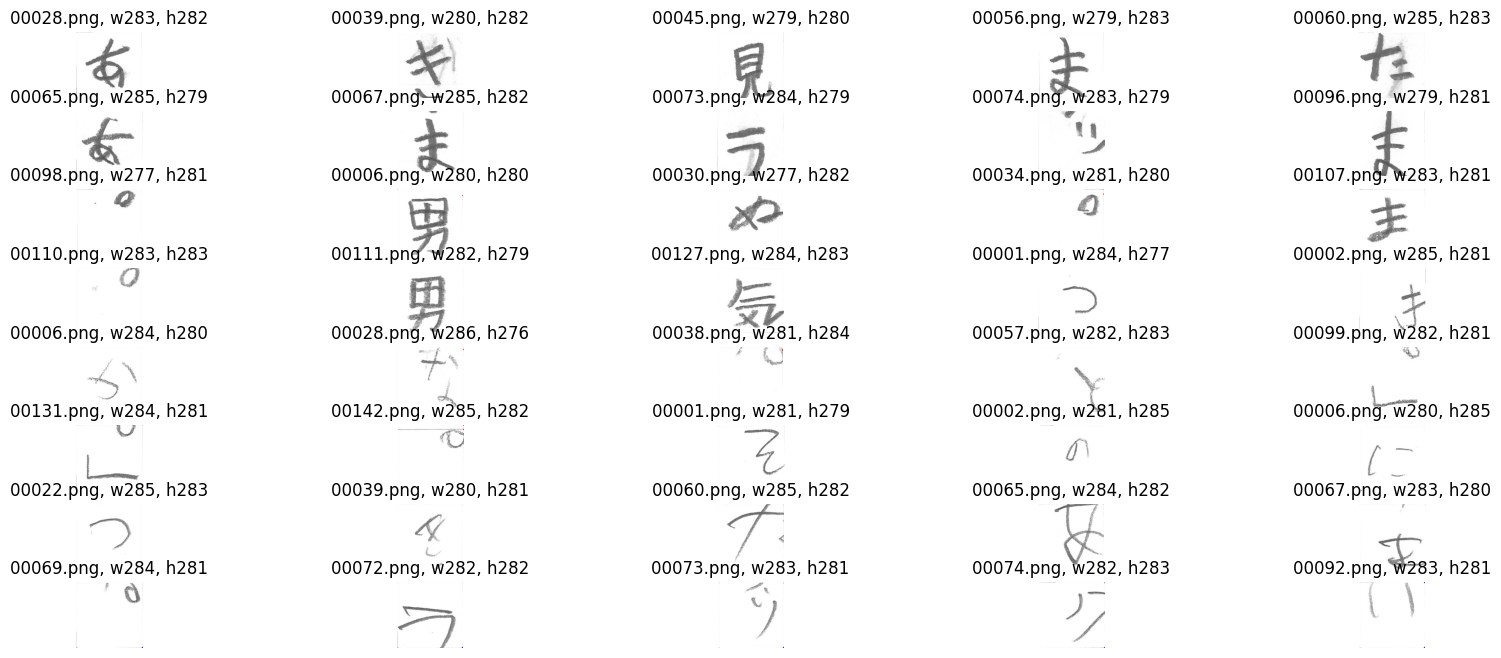

In [36]:
import sys
import json
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

def extract_matches(filename):
    with open(filename) as f:
        edits = json.loads(f.read())
        #print(edits)
        #sys.exit(0)

    matches = set()
    i = 0
    j = 0
    for e in edits["edits"]:
        op = e[0]
        if op == "MATCH":
            if e[1] not in [" ", "　"]:
                matches.add((i, j))
            i += 1
            j += 1
        elif op == "SKIP":
            i += 1
        elif op == "INSERT":
            j += 1

    return matches

# なんの字で間違えるか
def track_wrong_char(filename, total_wrong):
    with open(filename) as f:
        edits = json.loads(f.read())
    
    char = []
    i = 0
    j = 0
    for e in edits["edits"]:
        op = e[0]
        if op == "MATCH":
            if (i, j) in total_wrong:
                char.append([e[1], e[2]])
            i += 1
            j += 1
        elif op == "SKIP":
            i += 1
        elif op == "INSERT":
            j += 1

    return char

if len(sys.argv) != 3:
    print(f"Usage: {sys.argv[0]} <gold-dir> <test-dir>")
    sys.exit(1)

gold_dir = './HandwrittenTextAlign/HandwrittenTextAlign/fixed-2024-07-24/'#sys.argv[1]
test_dir = './HandwrittenTextAlign/HandwrittenTextAlign/align-2024-07-16/'#sys.argv[2]
#test_dir = './HandwrittenTextAlign/toda_alignment/align-2024-08-21/'#sys.argv[2]

gold_files = sorted(glob.glob(f"{gold_dir}/*/*.json"))
test_files = sorted(glob.glob(f"{test_dir}/*/*.json"))

# ab:
gold_files = [path for path in gold_files if os.path.basename(path) in map(os.path.basename, test_files)]

print(len(gold_files), len(test_files), flush = True)

assert len(gold_files) == len(test_files)

total_gold = 0
total_test = 0
total_correct = 0
total_wrong = set()
total_wrong_char = []

for gold_f, test_f in zip(gold_files, test_files):
    gold_match = extract_matches(gold_f)
    test_match = extract_matches(test_f)

    total_gold += len(gold_match)
    total_test += len(test_match)
    total_correct += len(gold_match & test_match)
    
    # なんの字で間違えるか
    total_wrong |= (gold_match | test_match) - (gold_match & test_match)
    total_wrong_char += track_wrong_char(gold_f, total_wrong)

precision = total_correct / total_test
recall = total_correct / total_gold
f1 = 2.0 * precision * recall / (precision + recall)

print(f"{precision=}, {recall=}, {f1=}")
print(f"バツ: {len(total_wrong)}")

# 先頭から10枚の画像を表示
fig, axes = plt.subplots(8, 5, figsize=(20, 8))  # 2行5列のサブプロットを作成
axes = axes.flatten()  # axesを1次元配列に変換

first_path = "/data2/abababam1/HandwrittenTextAlign/toda_char_imgs_nns_plot"
for ax, charlist in zip(axes, total_wrong_char[:40]):
    char, second_path = charlist
    img_path = first_path + second_path
    img = Image.open(img_path)  # 画像を読み込む
    ax.imshow(img)  # imshowを使って画像を表示
    ax.axis('off')  # 軸を非表示にする
    width, height = img.size
    ax.set_title(f'{os.path.basename(img_path)}, w{width}, h{height}')

In [ ]:
# 留意事項
# 板橋のデータをもう一度切り出す
# Screenshot 2024-09-21 at 16.07.13

In [ ]:
itabashi_sheet = '/data/matuzaki/sisha-data/itabashi-sheets'
itabashi_char = '/data/matuzaki/sisha-data/itabashi-char-imgs'
toda_sheet = '/data/matuzaki/sisha-data/toda-sheets'

In [ ]:
# ⚠️validationデータはETLと子供の字　☜テストする

# 子供の字を子供データ全体の60%使った場合 # ETL:子供＝432000:58381＝15:2
val mean loss=0.12175789868566682, accuracy=0.9728489069581445

# 60%を水増しした場合         # ETL:子供＝432000:98612＝9:2
val mean loss=0.39326716070080703, accuracy=0.9528542388696347　　　☜原因: 子供データ増に対しETLのval、水増しコードが変、他のデータ構成を見る

In [ ]:
# val data
# 20
val mean loss=0.04042014240984467, accuracy=0.9909782915139554
# 40
val mean loss=0.04564487568991899, accuracy=0.9897992675511332
# 60
val mean loss=0.04747589624030207, accuracy=0.9890383572783952
# 80
val mean loss=0.05304321925070775, accuracy=0.987511632544536
# 100
val mean loss=0.05997224653426716, accuracy=0.9857073011734029

In [ ]:
# test data

# ETL
test  mean loss=1.9561444876697498, accuracy=0.6550235261555494
# 20%
test  mean loss=0.5937532091155032, accuracy=0.8645895745955662
test  mean loss=0.47975423509474163, accuracy=0.8972438585979629
test  mean loss=0.5942407300441789, accuracy=0.9072798082684242
# 40%
test  mean loss=0.465341508692078, accuracy=0.88900539245
test  mean loss=0.39793741773566205, accuracy=0.9075294587577392
test  mean loss=0.38797427928966155, accuracy=0.9261533852606351
# 60%
test  mean loss=0.4101005417752556, accuracy=0.9043838625923707
test  mean loss=0.3705777861259763, accuracy=0.9120231675654085
test  mean loss=0.3276771026437859, accuracy=0.933043738765728
# 80%
test  mean loss=0.36554499414537583, accuracy=0.9140203714799281
test  mean loss=0.36255518040341345, accuracy=0.9151687637307769
test  mean loss=0.2962097526189972, accuracy=0.9387857000199721
# 100%
test  mean loss=0.3513540973325487, accuracy=0.9184142200918713
test  mean loss=0.3513540973325487, accuracy=0.9184142200918713
test  mean loss=0.26631060821776686, accuracy=0.9410325544238066

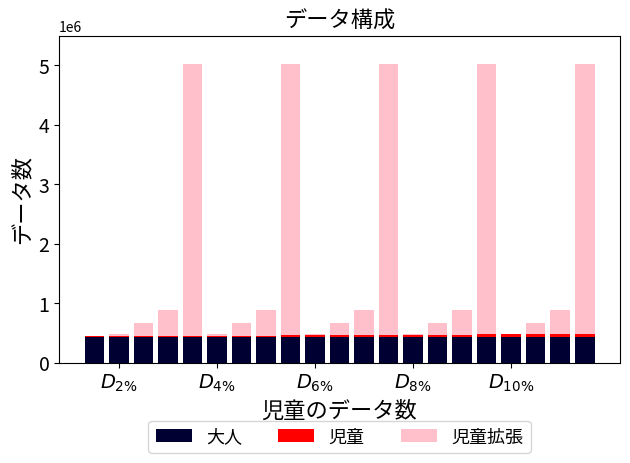

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# データの定義
etl = 432000
jidou_values = [9200, 18400, 27600, 36800, 46000]
jidou_labels = [r'$D_{2\%}$', r'$D_{4\%}$', r'$D_{6\%}$', r'$D_{8\%}$', r'$D_{10\%}$']
data_augmentation_values = [46000, 230000, 460000, 4600000]

# 新しい暗い紺色
dark_navy = '#000033'
colors_no_augmentation = ['navy', 'red']
colors_with_augmentation = ['navy', 'red', 'pink']

# X軸の位置を指定
x_positions = np.arange(len(jidou_values)) * 4 # 間隔を広げるために *4
#x_positions[0] -= 2

# グラフの作成
fig, ax = plt.subplots()

bar_width = 0.8  # 棒の幅を小さく設定

for i, (jidou, x_pos) in enumerate(zip(jidou_values, x_positions)):
    # データ拡張なし
    no_augmentation = [etl, jidou]
    ax.bar(x_pos, no_augmentation[0], color=dark_navy, width=bar_width, label="大人" if i == 0 else "")
    ax.bar(x_pos, no_augmentation[1], bottom=no_augmentation[0], color=colors_no_augmentation[1], width=bar_width, label="児童" if i == 0 else "")
    
    # データ拡張あり (46000, 460000)
    for j, aug in enumerate(data_augmentation_values):
        ax.bar(x_pos + (j+1), etl, color=dark_navy, width=bar_width, label="大人" if i == 0 and j == 0 else "")
        ax.bar(x_pos + (j+1), jidou, bottom=etl, color=colors_with_augmentation[1], width=bar_width, label="児童" if i == 0 and j == 0 else "")
        ax.bar(x_pos + (j+1), aug - jidou, bottom=etl + jidou, color=colors_with_augmentation[2], width=bar_width, label="児童拡張" if i == 0 and j == 0 else "")

# Y軸の範囲を0から1,000,000に設定
ax.set_ylim(0, 5500000)

# X軸のラベル設定
plt.xticks(x_positions + 1, [i for i in jidou_labels], rotation=0, fontsize=10)

# ラベルとタイトル
ax.set_xlabel('児童のデータ数', fontsize=16)
ax.set_ylabel('データ数', fontsize=16)
ax.set_title('データ構成', fontsize=16)

# 重複しないように凡例を追加
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(.5, -.15), ncol=3, fontsize=13)

# X軸とY軸の目盛り文字サイズを変更
plt.tick_params(axis='x', labelsize=14)  # X軸の目盛り文字サイズを14に設定
plt.tick_params(axis='y', labelsize=14)  # Y軸の目盛り文字サイズを14に設定

# グラフの表示
plt.tight_layout()
plt.show()

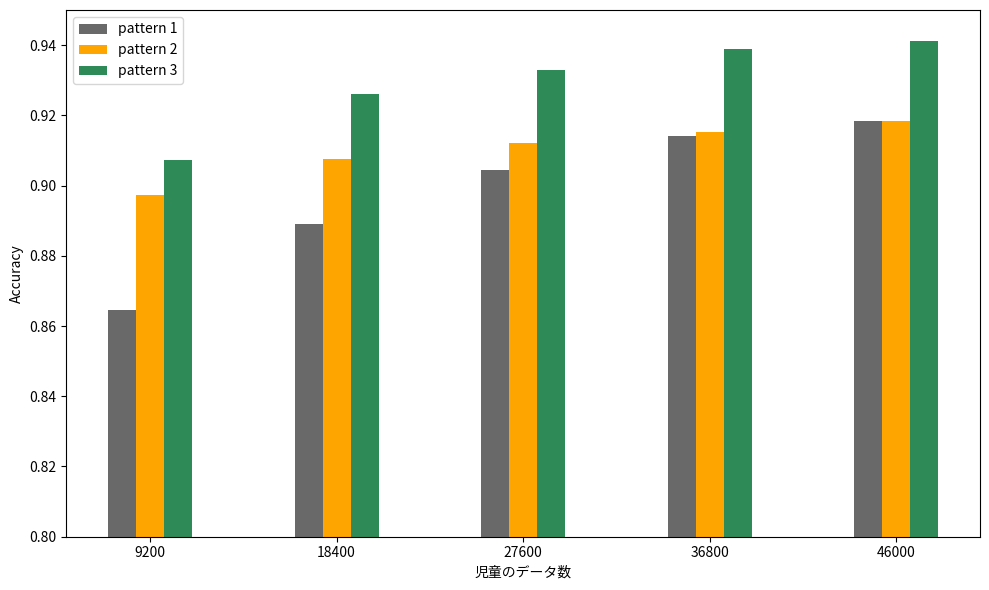

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# データの定義
percentages = ['20%', '40%', '60%', '80%', '100%']
accuracies = [
    [0.8645895745955662, 0.8972438585979629, 0.9072798082684242],  # 20%
    [0.88900539245, 0.9075294587577392, 0.9261533852606351],        # 40%
    [0.9043838625923707, 0.9120231675654085, 0.933043738765728],    # 60%
    [0.9140203714799281, 0.9151687637307769, 0.9387857000199721],   # 80%
    [0.9184142200918713, 0.9184142200918713, 0.9410325544238066]    # 100%
]

# 棒の幅
bar_width = 0.15
index = np.arange(len(percentages))

# 作成
plt.figure(figsize=(10, 6))

plt.bar(index - bar_width, [acc[0] for acc in accuracies], width=bar_width, color='dimgray', label='pattern 1')
plt.bar(index, [acc[1] for acc in accuracies], width=bar_width, color='orange', label='pattern 2')
plt.bar(index + bar_width, [acc[2] for acc in accuracies], width=bar_width, color='seagreen', label='pattern 3')

# 設定
plt.xlabel('児童のデータ数')
plt.ylabel('Accuracy')
#plt.xticks(index, percentages)
plt.xticks(index, ['9200', '18400', '27600', '36800', '46000'])
plt.ylim(0.8, 0.95)
plt.legend()

# 表示
plt.tight_layout()
plt.show()

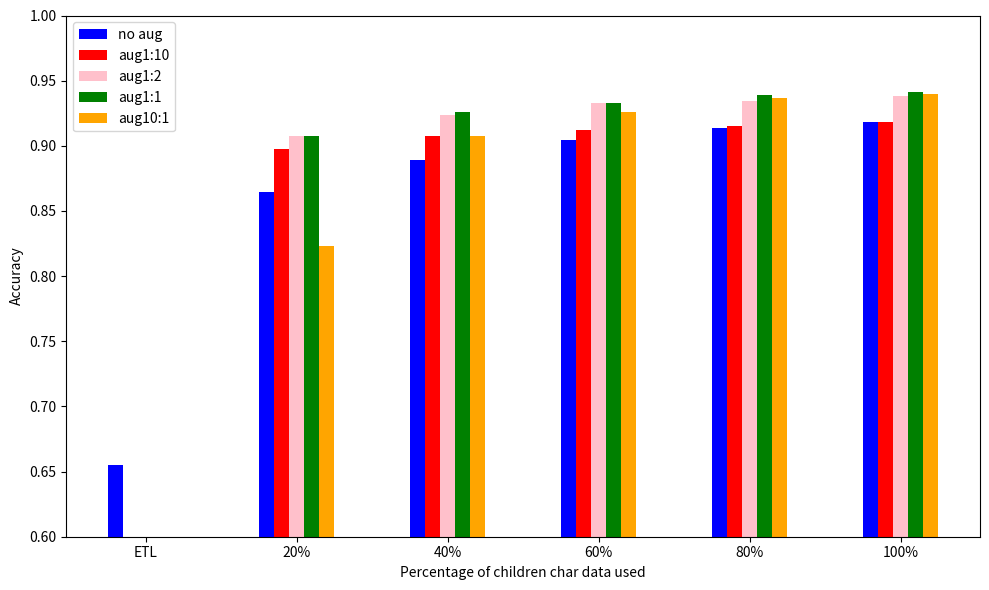

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# データの定義
percentages = ['ETL', '20%', '40%', '60%', '80%', '100%']
accuracies = [
    [0.6550235261555494, 0, 0, 0, 0],
    [0.8645895745955662, 0.8972438585979629, 0.9078789694427801, 0.9072798082684242, 0.823297383662872],  # 20%
    [0.88900539245, 0.9075294587577392, 0.9237567405632116, 0.9261533852606351, 0.9078789694427801],        # 40%
    [0.9043838625923707, 0.9120231675654085, 0.932794088276413, 0.933043738765728, 0.9261533852606351],    # 60%
    [0.9140203714799281, 0.9151687637307769, 0.9344417815058917, 0.9387857000199721, 0.9364389854204114],   # 80%
    [0.9184142200918713, 0.9184142200918713, 0.9380367485520271, 0.9410325544238066, 0.9396345116836429]    # 100%
]

# 棒の幅
bar_width = 0.1
index = np.arange(len(percentages))

# 作成
plt.figure(figsize=(10, 6))

plt.bar(index - 2*bar_width, [acc[0] for acc in accuracies], width=bar_width, color='blue', label='no aug')
plt.bar(index - bar_width, [acc[1] for acc in accuracies], width=bar_width, color='red', label='aug1:10')
plt.bar(index, [acc[2] for acc in accuracies], width=bar_width, color='pink', label='aug1:2')
plt.bar(index + bar_width, [acc[3] for acc in accuracies], width=bar_width, color='green', label='aug1:1')
plt.bar(index + 2*bar_width, [acc[4] for acc in accuracies], width=bar_width, color='orange', label='aug10:1')

# 設定
plt.xlabel('Percentage of children char data used')
plt.ylabel('Accuracy')
plt.xticks(index, percentages)
plt.ylim(0.6, 1.0)
plt.legend()

# 表示
plt.tight_layout()
plt.show()

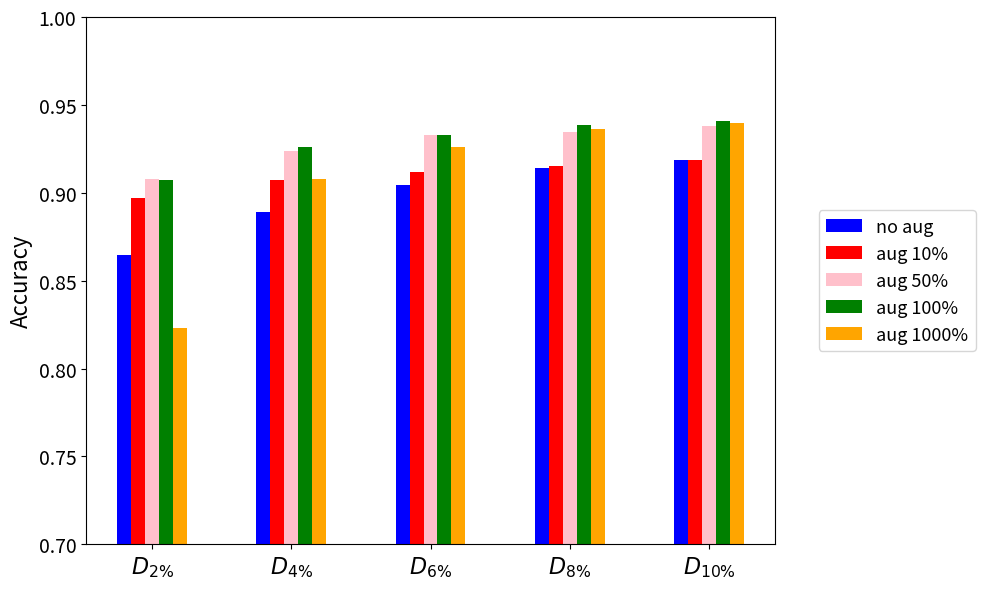

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# データの定義
percentages = [r'$D_{2\%}$', r'$D_{4\%}$', r'$D_{6\%}$', r'$D_{8\%}$', r'$D_{10\%}$']
accuracies = [
    [0.8645895745955662, 0.8972438585979629, 0.9078789694427801, 0.9072798082684242, 0.823297383662872],  # 20%
    [0.88900539245, 0.9075294587577392, 0.9237567405632116, 0.9261533852606351, 0.9078789694427801],        # 40%
    [0.9043838625923707, 0.9120231675654085, 0.932794088276413, 0.933043738765728, 0.9261533852606351],    # 60%
    [0.9140203714799281, 0.9151687637307769, 0.9344417815058917, 0.9387857000199721, 0.9364389854204114],   # 80%
    [0.9184142200918713, 0.9184142200918713, 0.9380367485520271, 0.9410325544238066, 0.9396345116836429]    # 100%
]

# 棒の幅
bar_width = 0.1
index = np.arange(len(percentages))

# 作成
plt.figure(figsize=(10, 6))

plt.bar(index - 2*bar_width, [acc[0] for acc in accuracies], width=bar_width, color='blue', label='no aug')
plt.bar(index - bar_width, [acc[1] for acc in accuracies], width=bar_width, color='red', label='aug 10%')
plt.bar(index, [acc[2] for acc in accuracies], width=bar_width, color='pink', label='aug 50%')
plt.bar(index + bar_width, [acc[3] for acc in accuracies], width=bar_width, color='green', label='aug 100%')
plt.bar(index + 2*bar_width, [acc[4] for acc in accuracies], width=bar_width, color='orange', label='aug 1000%')

# 設定
#plt.xlabel('Numbers of children Handwritten used', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(index, percentages)
plt.ylim(0.7, 1.0)
#plt.legend(fontsize=13)
# 凡例を右側に配置
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=13)

# X軸とY軸の目盛り文字サイズを変更
plt.tick_params(axis='x', labelsize=16)  # X軸の目盛り文字サイズを14に設定
plt.tick_params(axis='y', labelsize=14)  # Y軸の目盛り文字サイズを14に設定

# 表示
plt.tight_layout()
plt.show()

In [ ]:
# 各OCR精度
# ETL
test  mean loss=1.9561444876697498, accuracy=0.6550235261555494
# 20%
test  mean loss=0.5937532091155032, accuracy=0.8645895745955662
test  mean loss=0.47975423509474163, accuracy=0.8972438585979629
test  mean loss=0.5461867895880009, accuracy=0.9078789694427801    # 230,000
test  mean loss=0.5942407300441789, accuracy=0.9072798082684242
test  mean loss=0.777778266789029, accuracy=0.823297383662872
# 40%
test  mean loss=0.465341508692078, accuracy=0.88900539245
test  mean loss=0.39793741773566205, accuracy=0.9075294587577392
test  mean loss=0.3803568112362412, accuracy=0.9237567405632116    # 230,000
test  mean loss=0.38797427928966155, accuracy=0.9261533852606351
test  mean loss=0.447423746929522, accuracy=0.9078789694427801
# 60%
test  mean loss=0.4101005417752556, accuracy=0.9043838625923707
test  mean loss=0.3705777861259763, accuracy=0.9120231675654085
test  mean loss=0.3211783656944575, accuracy=0.932794088276413     # 230,000
test  mean loss=0.3276771026437859, accuracy=0.933043738765728
test  mean loss=0.36208394364739743, accuracy=0.9261533852606351
# 80%
test  mean loss=0.36554499414537583, accuracy=0.9140203714799281
test  mean loss=0.36255518040341345, accuracy=0.9151687637307769
test  mean loss=0.2981622246180912, accuracy=0.9344417815058917   # 230,000
test  mean loss=0.2962097526189972, accuracy=0.9387857000199721
test  mean loss=0.29538767289988577, accuracy=0.9364389854204114
# 100%
test  mean loss=0.3513540973325487, accuracy=0.9184142200918713    # 46,000
test  mean loss=0.3513540973325487, accuracy=0.9184142200918713    # 46,000
test  mean loss=0.27826179849478283, accuracy=0.9380367485520271   # 230,000
test  mean loss=0.26631060821776686, accuracy=0.9410325544238066   # 460,000
test  mean loss=0.2968977472014072, accuracy=0.9396345116836429    # 4,600,000

In [54]:
# 各アラインメント精度
from IPython.display import display, Math

# LaTeXでD_{10%}を表現
display(Math(r'D_{10\%}'))

<IPython.core.display.Math object>

In [ ]:
precision=0.905342306596225, recall=0.8839494017679416, f1=0.8945179666009659

In [ ]:
# 文字種ごとの検討
{'hiragana': 57578, 'katakana': 2565, 'kanji': 9719}

# PRMU_100_aug_10.pthに対するOCR精度
# ひらがな
test  mean loss=0.15132068490397574, accuracy=0.9618957145872915
# カタカナ 
test  mean loss=0.657292636630802, accuracy=0.8579040852575488
# 漢字    
test  mean loss=0.4499414459984598, accuracy=0.9224219489120151

# PRMU_100.pthに対するOCR精度
# ひらがな
test  mean loss=0.1986926674838116, accuracy=0.9451129406797552
# カタカナ 
test  mean loss=0.8040831525202966, accuracy=0.8259325044404974
# 漢字    
test  mean loss=0.5276373068792367, accuracy=0.8864711447492905

# PRMU_80.pthに対するOCR精度
# ひらがな
test  mean loss=0.21920196023738808, accuracy=0.9399408908591936
# カタカナ 
test  mean loss=0.8763836374503046, accuracy=0.8259325044404974
# 漢字    
test  mean loss=0.5407799880461751, accuracy=0.8807947019867549

# PRMU_60.pthに対するOCR精度
# ひらがな
test  mean loss=0.2453388575262376, accuracy=0.9320244880726198
# カタカナ 
test  mean loss=1.0165706476987362, accuracy=0.7957371225577264
# 漢字    
test  mean loss=0.5964936271746878, accuracy=0.859035004730369

# PRMU_40.pthに対するOCR精度
# ひらがな
test  mean loss=0.285683468413587, accuracy=0.9199915558370276
# カタカナ 
test  mean loss=1.241856741015907, accuracy=0.7815275310834814
# 漢字    
test  mean loss=0.7330140526157116, accuracy=0.8278145695364238

# PRMU_20.pthに対するOCR精度
# ひらがな
test  mean loss=0.36725956956520345, accuracy=0.8982478361832383
# カタカナ 
test  mean loss=1.9285960629397134, accuracy=0.7211367673179396
# 漢字    
test  mean loss=0.8760890053935849, accuracy=0.7994323557237465

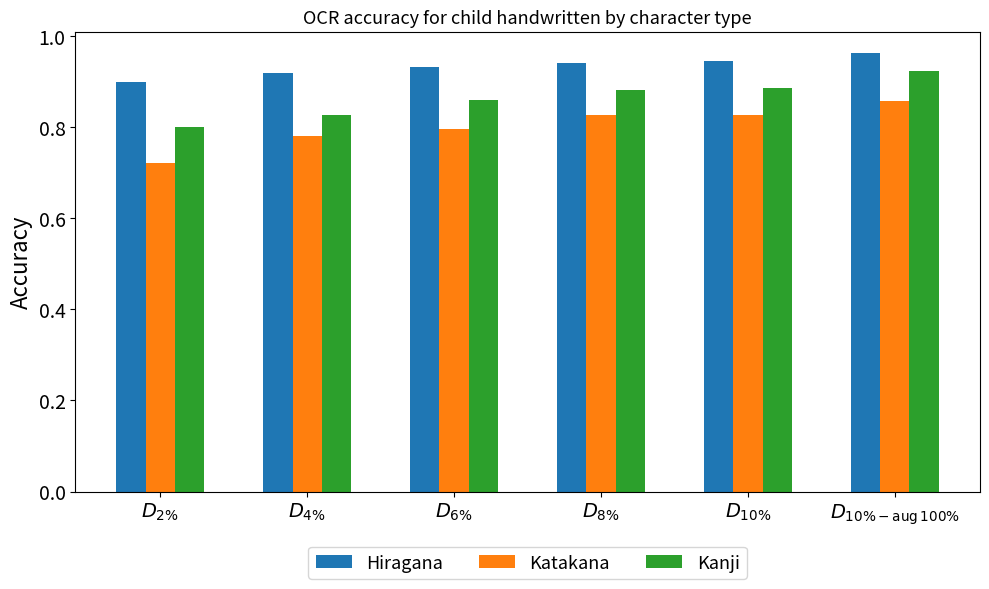

In [28]:
import matplotlib.pyplot as plt

# データセット名
datasets = [r'$D_{2\%}$', r'$D_{4\%}$', r'$D_{6\%}$', r'$D_{8\%}$', r'$D_{10\%}$', r'$D_{10\% - \mathrm{aug} \, 100\%}$']

# ひらがな、カタカナ、漢字それぞれのaccuracy値
hiragana_acc = [0.8982478361832383, 0.9199915558370276, 0.9320244880726198, 0.9399408908591936, 0.9451129406797552, 0.9618957145872915]
katakana_acc = [0.7211367673179396, 0.7815275310834814, 0.7957371225577264, 0.8259325044404974, 0.8259325044404974, 0.8579040852575488]
kanji_acc = [0.7994323557237465, 0.8278145695364238, 0.859035004730369, 0.8807947019867549, 0.8864711447492905, 0.9224219489120151]

# グラフの設定
x = range(len(datasets))
width = 0.2  # バーの幅

# グラフの作成
plt.figure(figsize=(10, 6))
plt.bar([i - width for i in x], hiragana_acc, width=width, label='Hiragana', align='center')
plt.bar(x, katakana_acc, width=width, label='Katakana', align='center')
plt.bar([i + width for i in x], kanji_acc, width=width, label='Kanji', align='center')

# ラベルとタイトル
#plt.xlabel('Dataset', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('OCR accuracy for child handwritten by character type', fontsize=13)
plt.xticks(x, datasets)
# X軸とY軸の目盛り文字サイズを変更
plt.tick_params(axis='x', labelsize=14)  # X軸の目盛り文字サイズを14に設定
plt.tick_params(axis='y', labelsize=14)  # Y軸の目盛り文字サイズを14に設定

#plt.legend()

#handles, labels = ax.get_legend_handles_labels()
#unique_labels = dict(zip(labels, handles))
#ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=13)

# グラフの表示
plt.tight_layout()
plt.show()

In [ ]:
メモ ガウシアンノイズは学習妨げになる

In [ ]:
データ検証
    最低ライン
    　・20~100
    　・水増しver. ~1/6, ~1/2, ~1(先), ~2(先)どこで下がるか
      ・アラインメント(戸田)
    十分
    　・20~100
対照学習
    最低ライン
    　・対象文字だけで判別できるか(活字)
    十分
    　・対象文字だけで判別できるか(手書き)　←　テストデータの設計　~9/30 プリント
    　・フォントをいじる
・~10/11 実験

原稿
・~10/11 スライド
・10/14~ 初稿
・10/21 初稿提出
・~10/28 

In [ ]:
✅ETLだけver
☑️拡張の割合あげる(ETL:子供=1:10)
☑️アラインメント精度
金ひらがな、カタカナ、漢字: 評価だけ
月テストデータで具体的に改善したものの例、失敗例

金〜日
✅LARSとバッチサイズの関係
・ラーニングレート考慮
・バッチサイズごとの正例と負例の割合に影響があるか考慮
・transformのgausian blur, noise → できればzi2zi
・テストデータ手書きの切り出し

木スライドの組み立て、アプリ機能（ゴール）のイメージを最初に、何が必要で何をやるか

In [ ]:
・(テストデータと訓練データの乖離)
    ・データ作成
    ・評価
・１００倍augmentaion
    ☑️訓練
    ☑️評価
☑️ひらがな、カタカナ、漢字: 評価だけ
☑️テストデータで具体的に改善したものの例、失敗例
☑️augmentation追加
・(1:2)
    
☑️表現抽出モデル変更
・データ大量バージョンの実装
・評価方法の確認

・はじめに
・実験方法
・実験

In [ ]:
10/30 15:30~
・アラインメント精度の詳細
・児童ならではの書き方の癖、具体例、今後の課題
明日昼まで完成系を提出

In [ ]:
11/06~13 やること
✅30エポックまで
✅ビューを10個まで作成してみて弊害があるか
☑️KanjiVGのテストデータで評価
☑️手書き誤字データの整備
✅論文

留意点
・はみ出している文字がどのように判別されるか

In [ ]:
11/18 18:00 スライド第1稿
11/22 10:30 対面練習

In [ ]:
11/13~20 やること
・KanjiVGのテストデータで評価
    ・ラベルの指定
    ・訓練でも評価してみる
・手書き誤字データの整備
・zi2ziより簡単なアーキテクチャを探す
・論文
    ・what makes for good...
    ・ビューを複数にした論文

In [ ]:
11/20~27 やること
・テストデータ　cosine距離計算で出す
・カラースポイトで吸う

In [ ]:
・なぜRGBA画像になってしまうのか

・手書き抜き出し
・子供の字も入れてコーディング
・一画抜けを入れて、それが一番上に来るのか

ランキングで上位と下位を見て

そのあとarcface

留意点: 訓練データの質としてKanji VGとのFreche Distance(FD)を閾値として実験するのは？？

In [ ]:
分類評価

対照学習の訓練: KanjiVG train（6379字種）

線形分類層: 
訓練: KanjiVG test data（24字種）
テスト: KanjiVG test data（24字種）
Test Accuracy: 97.21%
    → 訓練とテストのデータを同じくすると精度は高い

訓練: KanjiVG test data（24字種）
テスト: 手書き test data (字種はkanjiVGと同じ)
Test Accuracy: 25.90%
    → 訓練データの分布を広げれば上がりそう

訓練: KanjiVG train data（1275字種）20%
テスト: KanjiVG test data（24字種）
Test Accuracy: 0.00%
    → 字種が被ってないと❌